<h1 style="text-align: center;">
   NPI Paper - Final figures - Scatter plots
</h1>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import pearsonr

# 0- Data, global settings & plot functions

In [55]:
#Data path
#data_file = "Z:\\Github\\covid_npis\\Data\\raw_data_scatter_plots_cc_post_standardisation.xlsx"
data_file = "/Users/camille/Documents/GitHub/Excess-mortality_Western-Europe/Data/raw_data_scatter_plots_cc_post_standardisation.xlsx"

In [56]:
couleurs_pays = {
    'Belgium': '#C0CA33',
    'Denmark': '#33B5E5',
    'France': '#3F51B5',
    'Germany': '#90A4AE',
    'Ireland': '#26A69A',
    'Italy': '#1B5E20',
    'Netherlands': '#4CAF50',
    'Norway': '#8E24AA', 
    'Portugal': '#FDD835',
    'Spain': '#FF4081',
    'Sweden': '#1976D2',  
    'Switzerland': '#F00020',  
    'United Kingdom': '#FF9800',
    'England': '#FF9800'
}

In [57]:
def scatter_plot(data, abscisse, ordonnee, etiquette, xlim, ylim, dic_position, title, xlabel, ylabel, fac_abs=1, fac_ord=1, box='right', ax=None):
    data_temp = data[[abscisse, ordonnee, etiquette]].dropna()
    x = data_temp[abscisse]*fac_abs
    y = data_temp[ordonnee]*fac_ord
    label = data_temp[etiquette]
    
    if abscisse.startswith("mean_mobility"):
        # Inverser l'ordre des abscisses
        x = -x
    
    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.grid()

    for i, label in enumerate(label):
        ax.annotate(label, (x.iloc[i], y.iloc[i] + dic_position[label]))
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)

    coeffs = np.polyfit(x, y, 1)
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals = np.polyval(coeffs, x_vals)
    #ax.plot(x_vals, y_vals, color='gray', label='Approximation linéaire')
    
    spearman_corr, p = spearmanr(y, x)
    #pearson_corr, p_p = pearsonr(y, x)
    nb_round = 2 if p >= 0.01 else 3
    ajout_rho = '0' if len(str(round(spearman_corr, 2))) == 3 or spearman_corr < 0 and len(str(round(spearman_corr, 2))) == 4 else ''
    ajout_p = '0' if len(str(round(p, nb_round))) == nb_round + 1 else ''

    if box == 'right':
        ax.text(0.97, 0.97, f'Rho: {round(spearman_corr, 2)}{ajout_rho}\np: {round(p, nb_round)}{ajout_p}', 
                transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
        #ax.text(0.2, 0.97, f'Pearson: {round(pearson_corr, 2)}{ajout_rho}\np: {round(p_p, nb_round)}{ajout_p}', 
                #transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    else:
        ax.text(0.2, 0.97, f'Rho: {round(spearman_corr, 2)}{ajout_rho}\np: {round(p, nb_round)}{ajout_p}', 
                transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
        #ax.text(0.97, 0.97, f'Pearson: {round(pearson_corr, 2)}{ajout_rho}\np: {round(p_p, nb_round)}{ajout_p}', 
                #transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    
    ax.set_title(title, fontsize='x-large')
    ax.set_xlabel(xlabel, fontsize='large')
    ax.set_ylabel(ylabel, fontsize='large')
    return ax

# I- Hospital admission

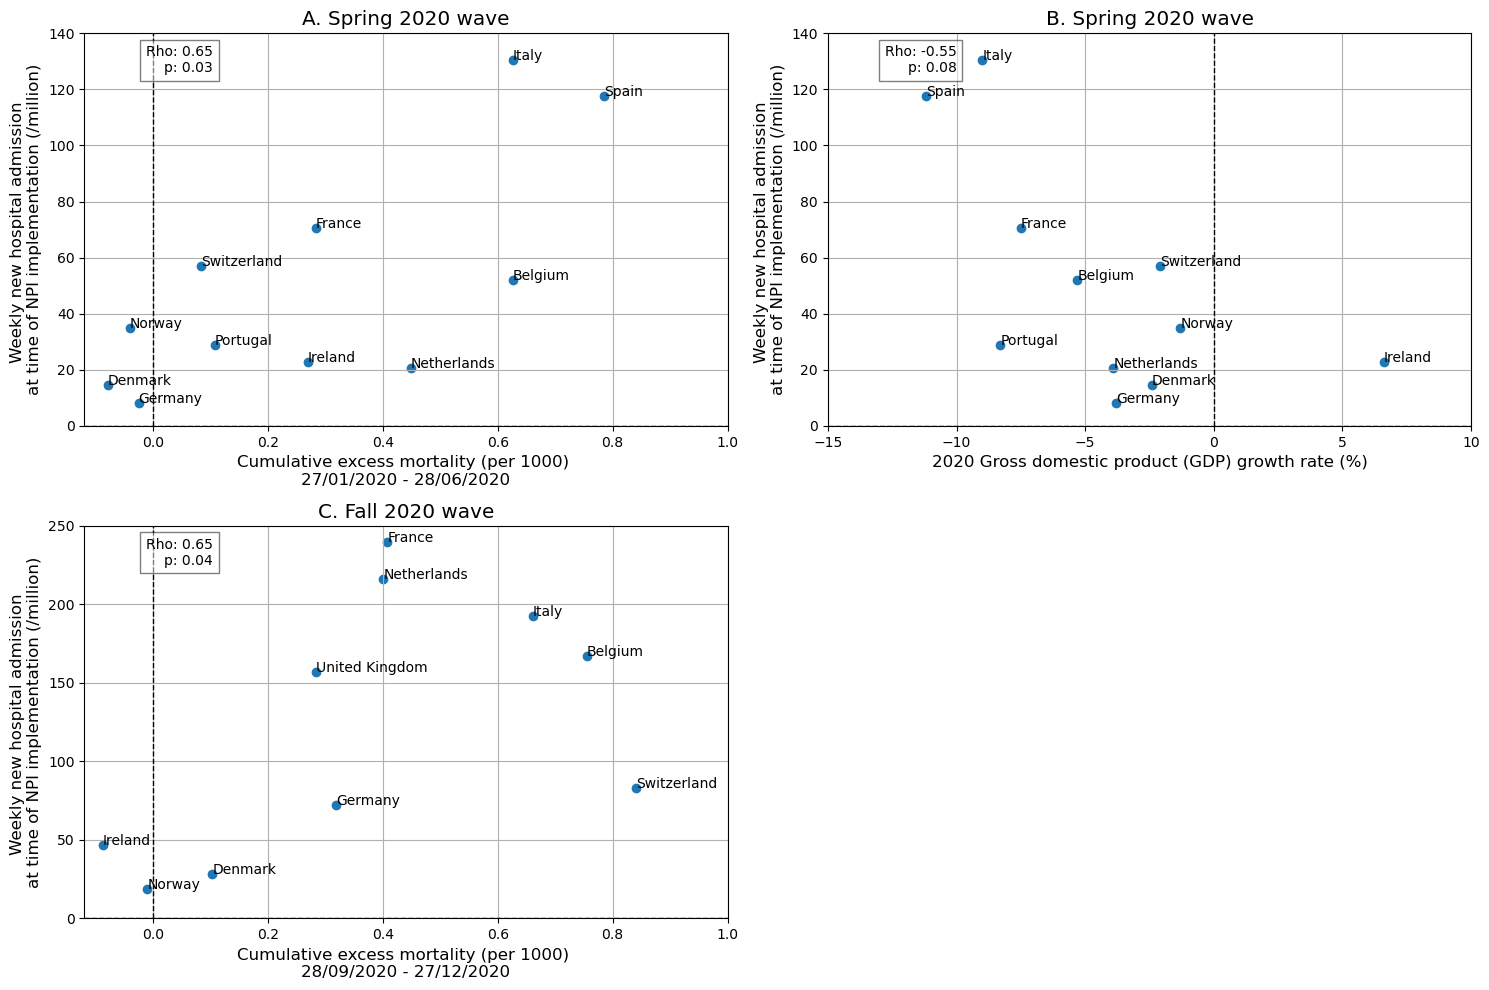

In [58]:
data_hosp = pd.read_excel(data_file, sheet_name='Hospital admission')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

title = "A. Spring 2020 wave"
xlabel = 'Cumulative excess mortality (per 1000) \n27/01/2020 - 28/06/2020'
ylabel = 'Weekly new hospital admission \nat time of NPI implementation (/million)'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
scatter_plot(data_hosp, 'Excess_mort 27/01/2020-28/06/2020', 'Hospital admission first wave', 'Country',[-0.12,1],[0,140], dic_position, title, xlabel, ylabel, fac_abs=1000, fac_ord=1, box='left', ax=axes[0,0])

title = "B. Spring 2020 wave"
xlabel = '2020 Gross domestic product (GDP) growth rate (%)'
ylabel = 'Weekly new hospital admission \nat time of NPI implementation (/million)'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
scatter_plot(data_hosp, 'GDP 2020', 'Hospital admission first wave', 'Country',[-15,10],[0,140], dic_position, title, xlabel, ylabel, fac_abs=1, fac_ord=1, box='left', ax=axes[0,1])

title = "C. Fall 2020 wave"
xlabel = 'Cumulative excess mortality (per 1000) \n28/09/2020 - 27/12/2020'
ylabel = 'Weekly new hospital admission \nat time of NPI implementation (/million)'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
scatter_plot(data_hosp, 'Excess_mort 28/09/2020-27/12/2020', 'Hospital admission second wave', 'Country', [-0.12,1], [0,250], dic_position, title, xlabel, ylabel, fac_abs=1000, fac_ord=1, box='left', ax=axes[1,0])

fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

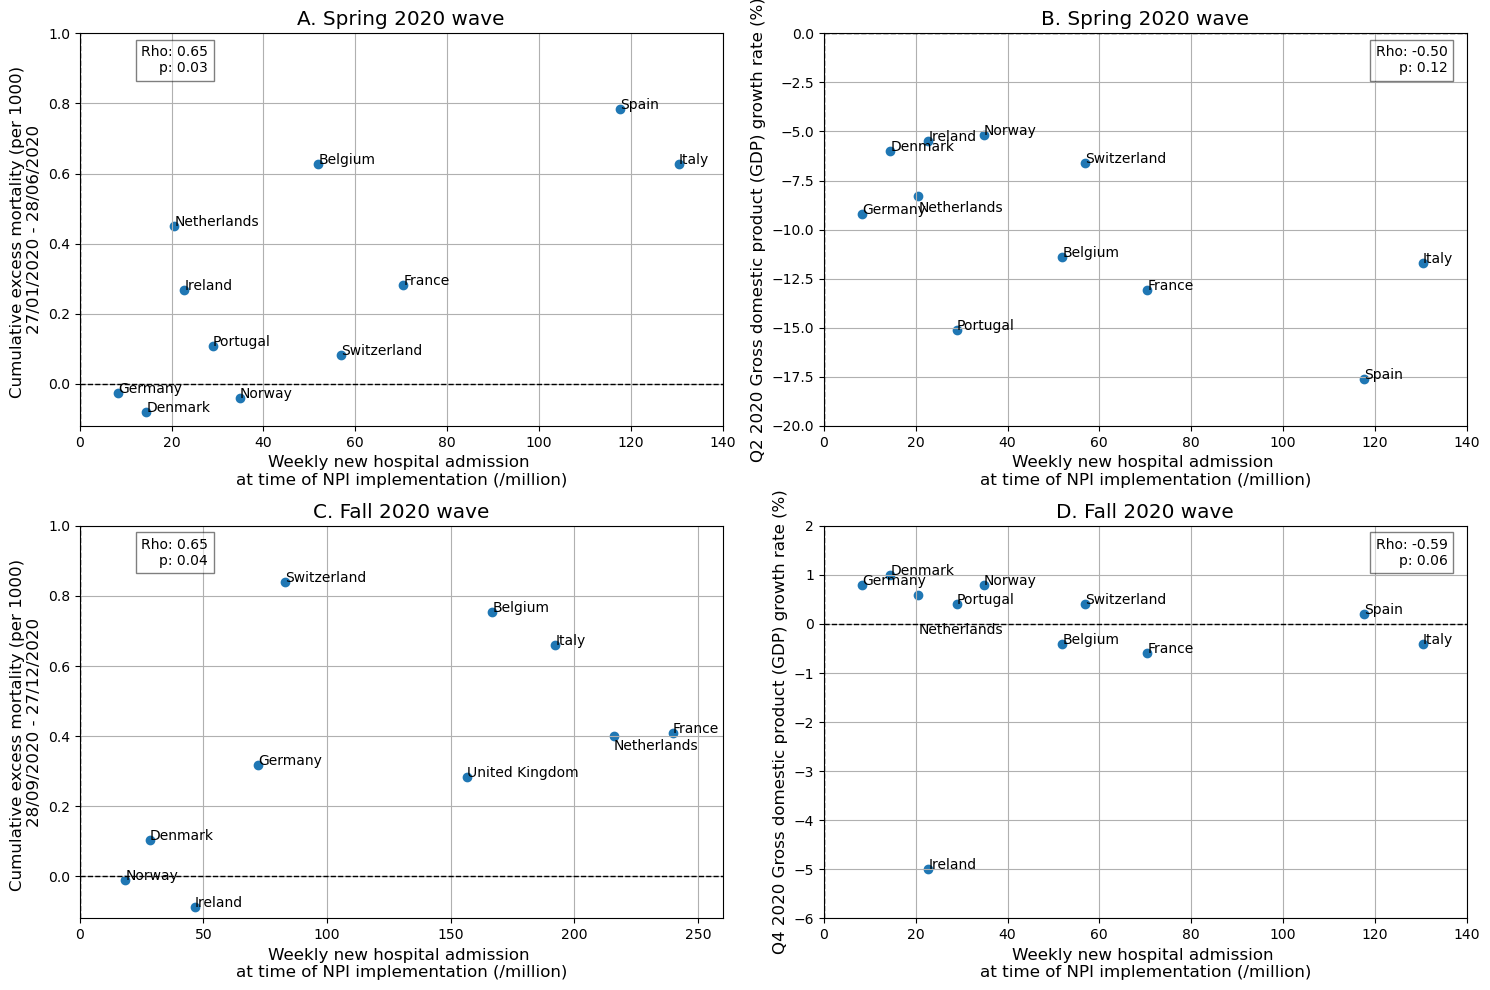

In [59]:
data_hosp = pd.read_excel(data_file, sheet_name='Hospital admission')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

title = "A. Spring 2020 wave"
xlabel = 'Weekly new hospital admission \nat time of NPI implementation (/million)'
ylabel = 'Cumulative excess mortality (per 1000) \n27/01/2020 - 28/06/2020'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
scatter_plot(data_hosp, 'Hospital admission first wave', 'Excess_mort 27/01/2020-28/06/2020', 'Country',[0,140],[-0.12,1], dic_position, title, xlabel, ylabel, fac_abs=1, fac_ord=1000, box='left', ax=axes[0,0])

title = "B. Spring 2020 wave"
xlabel = 'Weekly new hospital admission \nat time of NPI implementation (/million)'
#ylabel = '2020 Gross domestic product (GDP) growth rate (%)'
ylabel = 'Q2 2020 Gross domestic product (GDP) growth rate (%)'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.8, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
#scatter_plot(data_hosp, 'Hospital admission first wave', 'GDP 2020 Q2', 'Country',[0,140],[-15,10], dic_position, title, xlabel, ylabel, fac_abs=1, fac_ord=1, box='right', ax=axes[0,1])
scatter_plot(data_hosp, 'Hospital admission first wave', 'GDP 2020 Q2', 'Country',[0,140],[-20,0], dic_position, title, xlabel, ylabel, fac_abs=1, fac_ord=1, box='right', ax=axes[0,1])

title = "C. Fall 2020 wave"
xlabel = 'Weekly new hospital admission \nat time of NPI implementation (/million)'
ylabel = 'Cumulative excess mortality (per 1000) \n28/09/2020 - 27/12/2020'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.04, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
scatter_plot(data_hosp, 'Hospital admission second wave', 'Excess_mort 28/09/2020-27/12/2020', 'Country', [0,260], [-0.12,1], dic_position, title, xlabel, ylabel, fac_abs=1, fac_ord=1000, box='left', ax=axes[1,0])

title = "D. Fall 2020 wave"
xlabel = 'Weekly new hospital admission \nat time of NPI implementation (/million)'
ylabel = 'Q4 2020 Gross domestic product (GDP) growth rate (%)'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.8, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
scatter_plot(data_hosp, 'Hospital admission first wave', 'GDP 2020 Q4', 'Country',[0,140],[-6,2], dic_position, title, xlabel, ylabel, fac_abs=1, fac_ord=1, box='right', ax=axes[1,1])

#fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

# II- Vaccination

In [60]:
df_first=pd.read_excel(data_file, sheet_name='Vacc coverage 80+ first dose')
df_full_vac=pd.read_excel(data_file, sheet_name='Vacc coverage 80+ primary serie')
df_booster=pd.read_excel(data_file, sheet_name='Vacc coverage 80+ first booster')
data_vaccin = pd.read_excel(data_file, sheet_name='Vaccination scatter plot')

df_full_vac['date'] = pd.to_datetime(df_full_vac['date'])
df_booster['date'] = pd.to_datetime(df_booster['date'])
df_first['date'] = pd.to_datetime(df_first['date'])

In [61]:
def plot_vacc(ax, df, date_debut, date_fin, title, dic_position,xlim, ylim):
    df_temp = df[(df['date'] >= date_debut) & (df['date'] <= date_fin)]
    pays = df_temp.columns
    for p in pays[1:]:
        df_temp_pays=df_temp[['date',p]]
        df_temp_pays=df_temp_pays.dropna()
        if len(df_temp_pays)>0:
            ax.plot(df_temp_pays['date'], df_temp_pays[p], label=p,  color=couleurs_pays[p])
            x_end = df_temp_pays['date'].iloc[-1]
            y_end = df_temp_pays[p].iloc[-1]
            # Ajuster les étiquettes
            x_text = x_end + pd.DateOffset(days=1)
            y_text = y_end + dic_position[p]
            ax.annotate(p, xy=(x_end, y_end), xytext=(x_text, y_text), fontsize='small')

    # Boîte et grille
    ax.set_xlim(df_temp['date'].min() - pd.DateOffset(days=xlim[0]), min(date_fin,df_temp['date'].max()) + pd.DateOffset(days=xlim[1]))
    ax.set_ylim(ylim[0], ylim[1])
    ax.grid(axis='y', linestyle='--')

    # Axes
    ax.set_title(title, fontsize='x-large')
    #ax.set_xlabel('Date', fontsize='x-large')
    ax.tick_params(axis='both', which='both', labelsize='x-large')
    ax.tick_params(axis='x', which='both', rotation=45)

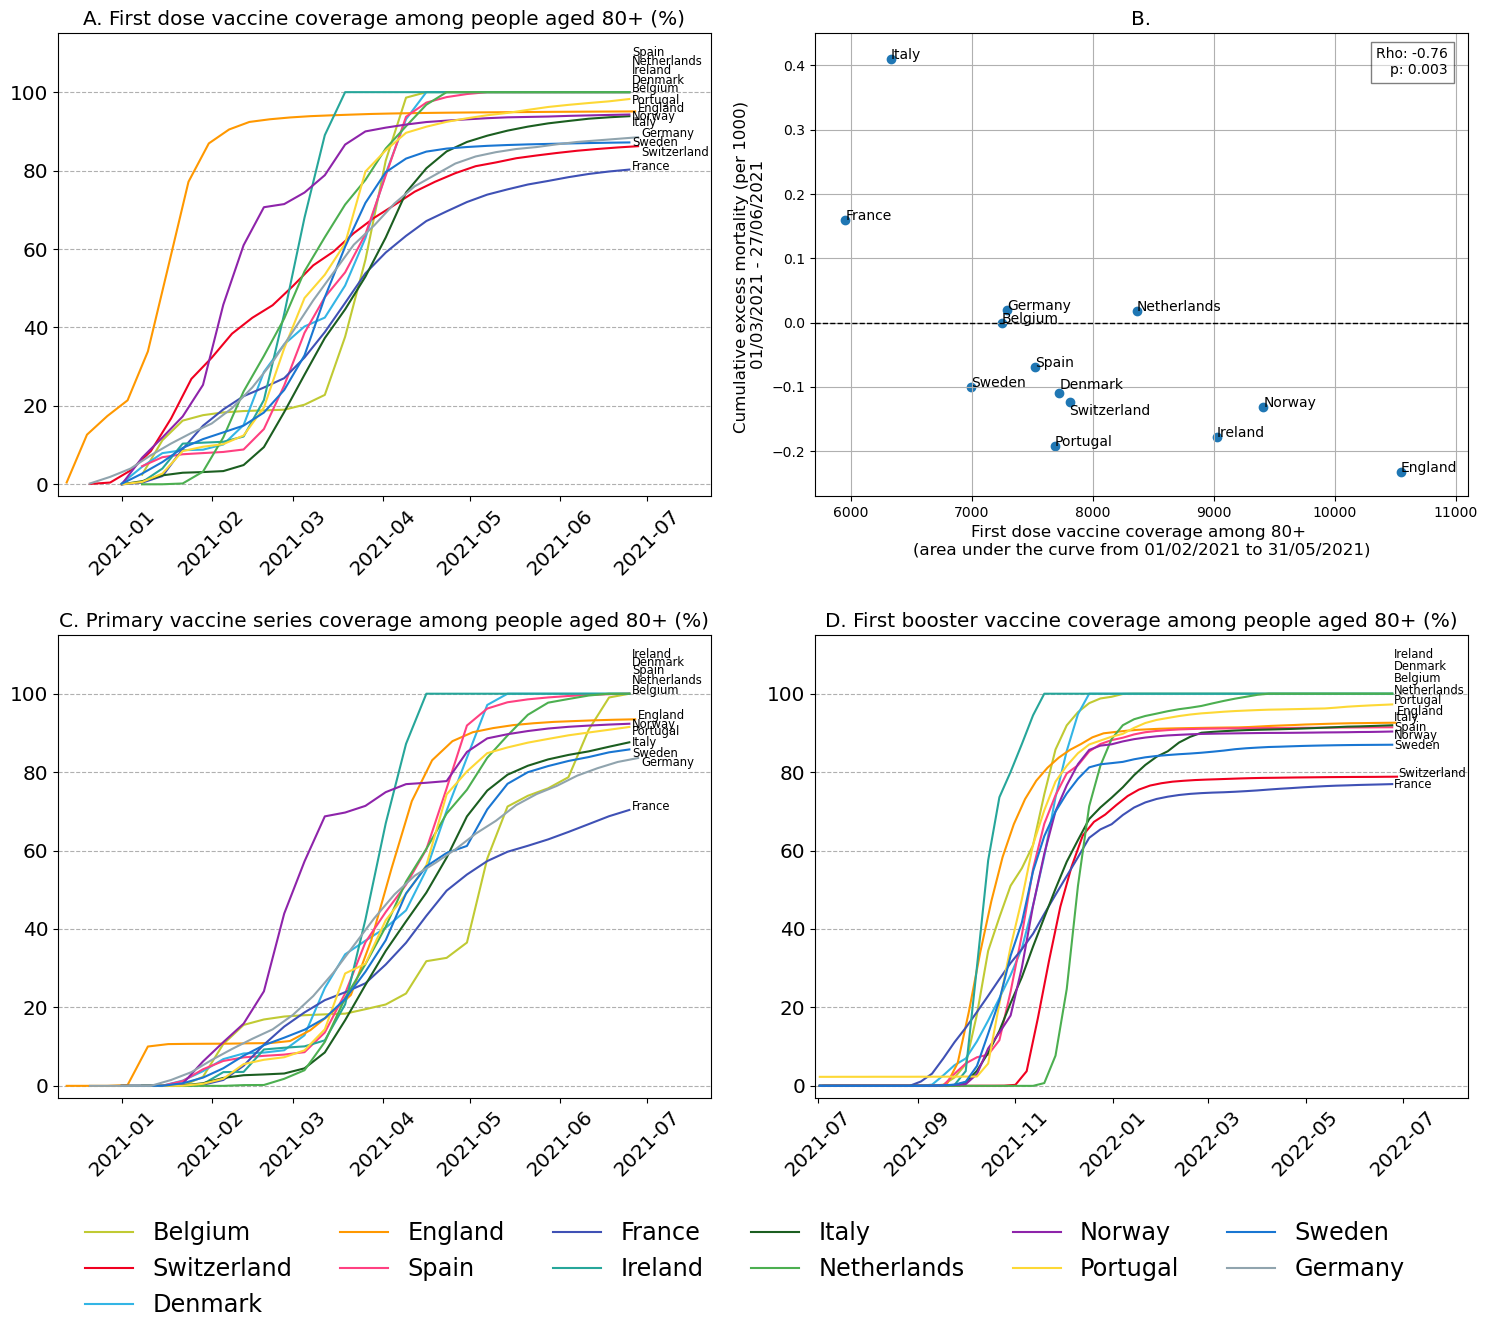

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12)) 

title='A. First dose vaccine coverage among people aged 80+ (%)'
dic_position={'Belgium':0, 'Denmark':2, 'France':0, 'Germany':0, 'Ireland':4.7, 'Italy':-2.5, 'Netherlands':7, 'Norway':-1.5, 'Portugal':-1.3, 'Spain':9.2, 'Sweden':-1, 'Switzerland':-2.5, 'United Kingdom':0, 'England':-0.1}
plot_vacc(axs[0, 0], df_first, pd.to_datetime('2020-12-01'), pd.to_datetime('2021-06-30'), title, dic_position, [3,25],[-3,115])

#title = 'B. Correlation of cumulative excess mortality with \nfirst dose vaccine coverage area under the curve in people aged 80+ '
title = 'B.'
xlabel = 'First dose vaccine coverage among 80+ \n(area under the curve from 01/02/2021 to 31/05/2021)'
ylabel = 'Cumulative excess mortality (per 1000) \n01/03/2021 - 27/06/2021'
dic_position={'Belgium':0, 'Denmark':0.005, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':-0.02, 'United Kingdom':0, 'England':0}
scatter_plot(data_vaccin, 'Vaccine Coverage first dose 80+ area under the curve from 01/02/2021 to 31/05/2021', 'Cumulative Excess From 01/03/2021 to 27/06/2021', 'Country',[5700,11100],[-0.27,0.45], dic_position, title, xlabel, ylabel, fac_abs=1, fac_ord=1000, box='right', ax=axs[0,1])

title='C. Primary vaccine series coverage among people aged 80+ (%)'
dic_position={'Belgium':0, 'Denmark':7, 'France':0, 'Germany':-2, 'Ireland':9, 'Italy':-1, 'Netherlands':2.5, 'Norway':-1, 'Portugal':-2, 'Spain':5, 'Sweden':-2, 'Switzerland':0, 'United Kingdom':0, 'England':0}
plot_vacc(axs[1, 0], df_full_vac, pd.to_datetime('2020-12-01'), pd.to_datetime('2021-06-30'), title, dic_position, [3,25], [-3,115])

title='D. First booster vaccine coverage among people aged 80+ (%)'
dic_position={'Belgium':3, 'Denmark':6, 'France':-1, 'Germany':0, 'Ireland':9, 'Italy':1, 'Netherlands':0, 'Norway':-2, 'Portugal':0, 'Spain':-1, 'Sweden':-1, 'Switzerland':0, 'United Kingdom':0, 'England':2}
plot_vacc(axs[1, 1], df_booster, pd.to_datetime('2021-07-01'), pd.to_datetime('2022-06-30'), title, dic_position, [3,44], [-3,115])

# Réglages globaux
#plt.suptitle('Fig. 4', fontsize='xx-large')
plt.tight_layout()

# Légende globale
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=6, fontsize='xx-large', frameon=False)

plt.subplots_adjust(wspace=0.16, hspace=0.3)
plt.show()

In [63]:
# on calcul l'aire sour la courbe de first booster 
df = df_booster
date_debut=pd.to_datetime('2021-09-01')
date_fin=pd.to_datetime('2021-12-31')
df_temp = df[(df['date'] >= date_debut) & (df['date'] <= date_fin)]
pays = df_temp.columns
for p in pays[1:]:
    df_temp_pays=df_temp[['date',p]]
    df_temp_pays=df_temp_pays.dropna()
    df_temp_pays['date'] = (df_temp_pays['date'] - df_temp_pays['date'].min()).dt.days
    if len(df_temp_pays)>0:
            area = np.trapz(df_temp_pays[p], df_temp_pays['date'])
            print("Pays : " +str(p)+ "\nAire sous la courbe: "+ str(area))

Pays : Belgium
Aire sous la courbe: 6053.879999999999
Pays : Switzerland
Aire sous la courbe: 2245.075
Pays : Denmark
Aire sous la courbe: 5160.995
Pays : England
Aire sous la courbe: 5975.9554057000005
Pays : Spain
Aire sous la courbe: 4706.94
Pays : France
Aire sous la courbe: 4038.6499999999996
Pays : Ireland
Aire sous la courbe: 7540.295
Pays : Italy
Aire sous la courbe: 3503.605
Pays : Netherlands
Aire sous la courbe: 1969.2399999999998
Pays : Norway
Aire sous la courbe: 4373.845
Pays : Portugal
Aire sous la courbe: 5026.735000000001
Pays : Sweden
Aire sous la courbe: 4634.839999999999


<Axes: xlabel='First booster vaccine coverage among 80+ \narea under the curve 01/09/2021 - 31/12/2021', ylabel='Cumulative excess mortality (per 1000) \n04/10/2021 - 30/01/2022'>

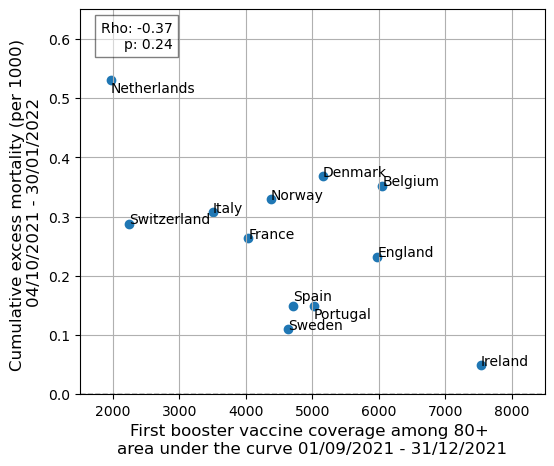

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))  

#title = 'B. Correlation of cumulative excess mortality with \nfirst booster vaccine coverage area under the curve in people aged 80 and above '
title =''
#xlabel ='First booster vaccine coverage among 80+ \narea under the curve 01/10/2021 - 30/05/2022'
xlabel ='First booster vaccine coverage among 80+ \narea under the curve 01/09/2021 - 31/12/2021'
#ylabel =  'Cumulative excess mortality (per 1000) \n01/11/2021 - 26/06/2022'
ylabel =  'Cumulative excess mortality (per 1000) \n04/10/2021 - 30/01/2022'

dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.02, 'Norway':0, 'Portugal':-0.02, 'Spain':0.01, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
#scatter_plot(data_vaccin, 'Vaccine Coverage first booster 80+ area under the curve', 'Cumulative Excess From 01/11/2021 to 26/06/2022', 'Country',[13500,23500],[0,0.8], dic_position, title, xlabel, ylabel,fac_ord=1000, box='left', ax=ax)

scatter_plot(data_vaccin, 'Vaccine Coverage first booster 80+ area under the curve 01/09/2021 - 31/12/2021', 'Cumulative Excess From 04/10/2021 to 30/01/2022', 'Country',[1500,8500],[0,0.65], dic_position, title, xlabel, ylabel,fac_ord=1000, box='left', ax=ax)

# III-Scatter plots

In [65]:
data = pd.read_excel(data_file)

# IV- Supplementary scatter plots

### IV-1) Socio-economic indicators

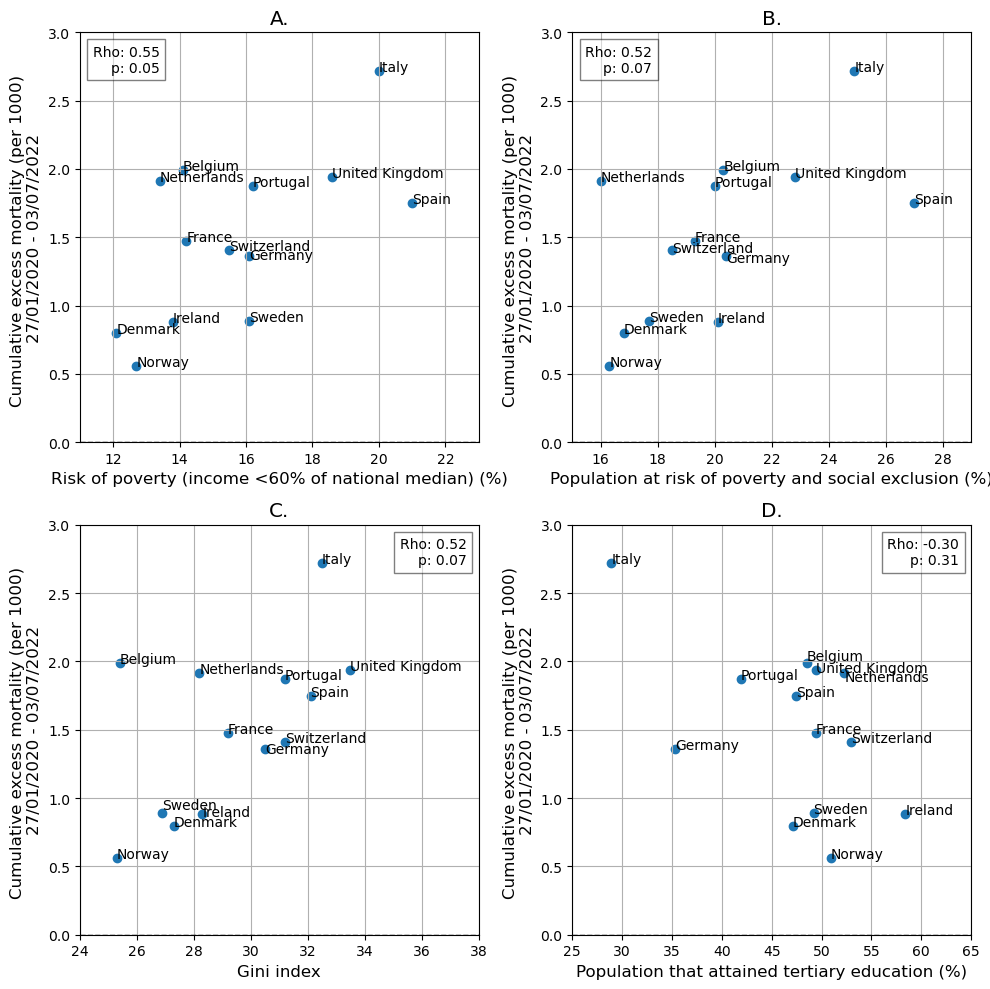

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

title="A."
xlabel='Risk of poverty (income <60% of national median) (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':-0.02, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Poverty_risk_2020', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [11,23], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[0,0])

title="B."
xlabel='Population at risk of poverty and social exclusion (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':-0.04, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':-0.02, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Risk of poverty and social exclusion', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [15,29], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[0,1])

title="C."
xlabel='Gini index'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':-0.03, 'Ireland':-0.01, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0.03, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Gini_income_2020', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [24,38], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1,0])

title="D."
xlabel='Population that attained tertiary education (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0.02, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.06, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':-0.02, 'England':0}
scatter_plot(data, 'Tertiary education', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [25,65], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1,1])

plt.tight_layout()
plt.show()

### IV-2) Demographic indicators

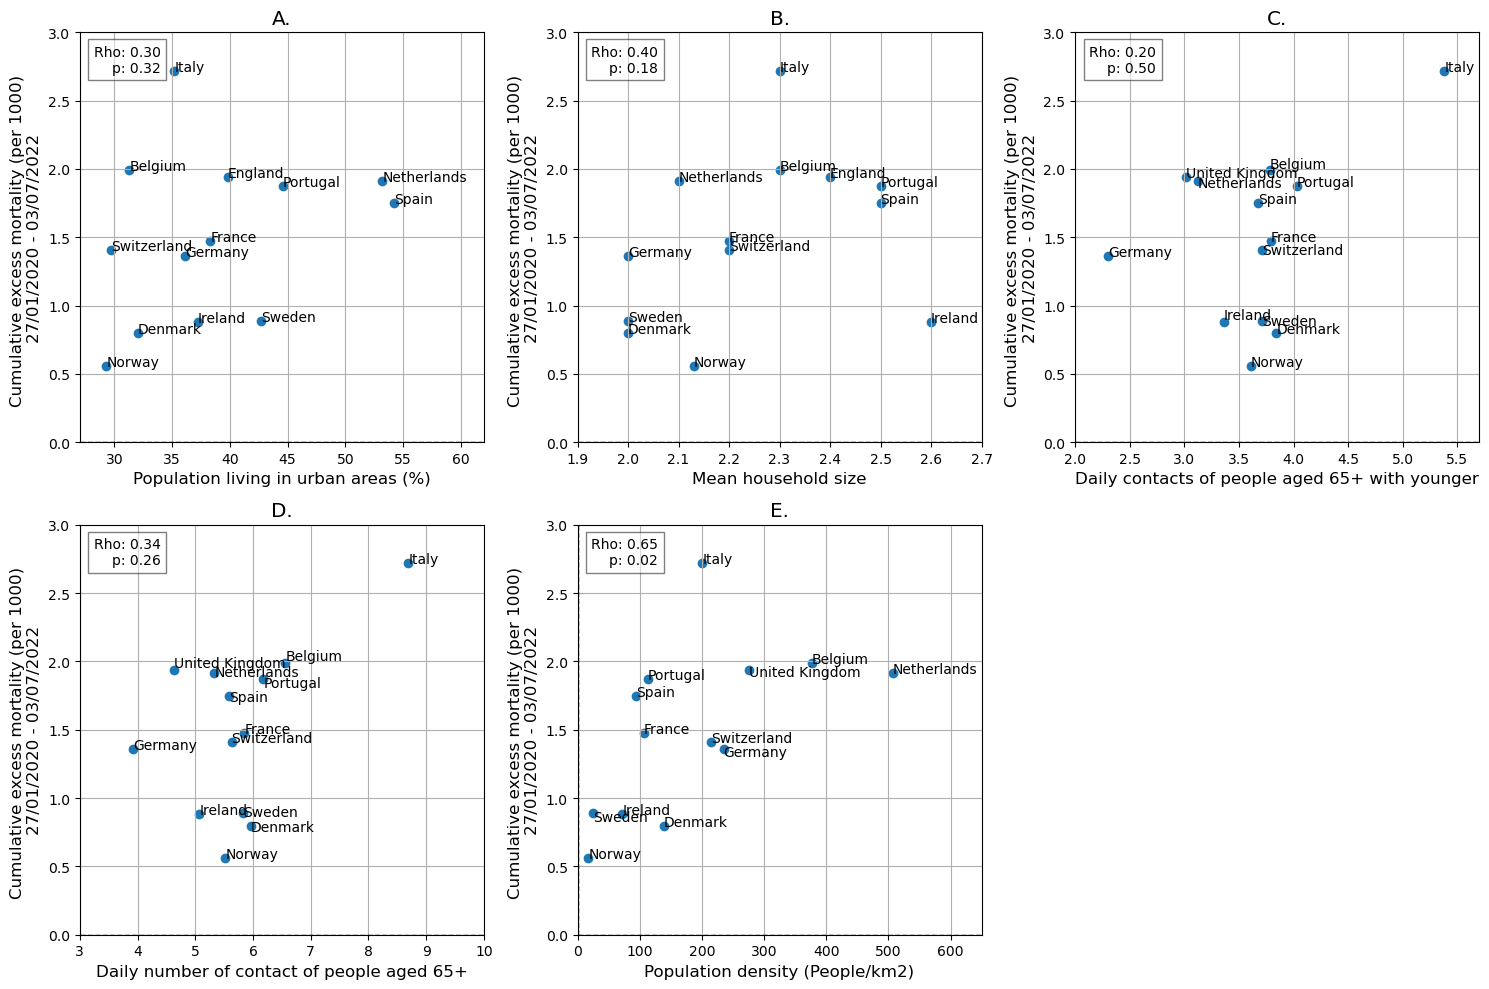

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

title="A."
xlabel='Population living in urban areas (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Share of population living in urban area', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [27,62], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[0,0])

title="B."
xlabel='Mean household size'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Household size', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [1.9,2.7], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[0,1])

title="C."
xlabel='Daily contacts of people aged 65+ with younger'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0.02, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0.02, 'Italy':0, 'Netherlands':-0.05, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':-0.03, 'Switzerland':-0.03, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Contacts of 65+ with younger individuals', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [2,5.7], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[0,2])

title="D."
xlabel='Daily number of contact of people aged 65+'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0.02, 'Denmark':-0.04, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.02, 'Norway':0, 'Portugal':-0.06, 'Spain':-0.04, 'Sweden':-0.02, 'Switzerland':0, 'United Kingdom':0.02, 'England':0}
scatter_plot(data, 'Contacts of 65+', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [3,10], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[1,0])

title="E."
xlabel='Population density (People/km2)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':-0.05, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':-0.06, 'Switzerland':0, 'United Kingdom':-0.05, 'England':0}
scatter_plot(data, 'Population density', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [0,650], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[1,1])


fig.delaxes(axes[1,2])
plt.tight_layout()
plt.show()

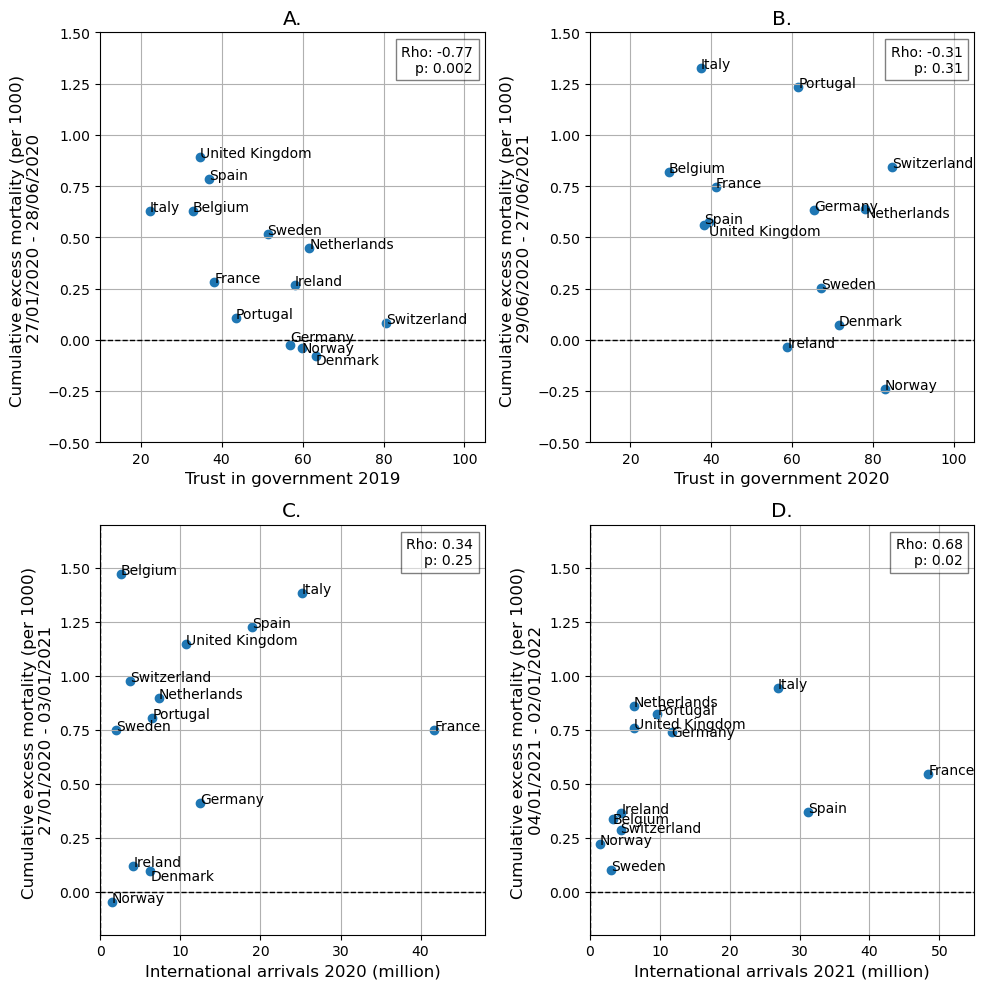

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

title="A."
xlabel='Trust in government 2019'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 28/06/2020'
dic_position={'Belgium':0, 'Denmark':-0.04, 'France':0, 'Germany':0.02, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':-0.02, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Trust in gov 2019', 'Excess_mort 27/01/2020-28/06/2020', 'Country', [10,105], [-0.5,1.5], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[0,0])


title="B."
xlabel='Trust in government 2020'
ylabel='Cumulative excess mortality (per 1000) \n29/06/2020 - 27/06/2021'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.04, 'Norway':0, 'Portugal':0, 'Spain':0.01, 'Sweden':0, 'Switzerland':0, 'United Kingdom':-0.06, 'England':0}
scatter_plot(data, 'Trust in gov 2020', 'Excess_mort 29/06/2020-27/06/2021', 'Country', [10,105], [-0.5,1.5], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[0,1])

title="C."
xlabel='International arrivals 2020 (million)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/01/2021'
dic_position={'Belgium':0, 'Denmark':-0.04, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'International arrivals 2020', 'Excess_mort 27/01/2020-03/01/2021', 'Country', [0,48], [-0.2,1.7], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1,0])

title="D."
xlabel='International arrivals 2021 (million)'
ylabel='Cumulative excess mortality (per 1000) \n04/01/2021 - 02/01/2022'
dic_position={'Belgium':-0.02, 'Denmark':0, 'France':0, 'Germany':-0.02, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':-0.01, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'International arrivals 2021', 'Excess_mort 04/01/2021-02/01/2022', 'Country', [0,55], [-0.2,1.7], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1,1])


plt.tight_layout()
plt.show()

### IV-3) Health status

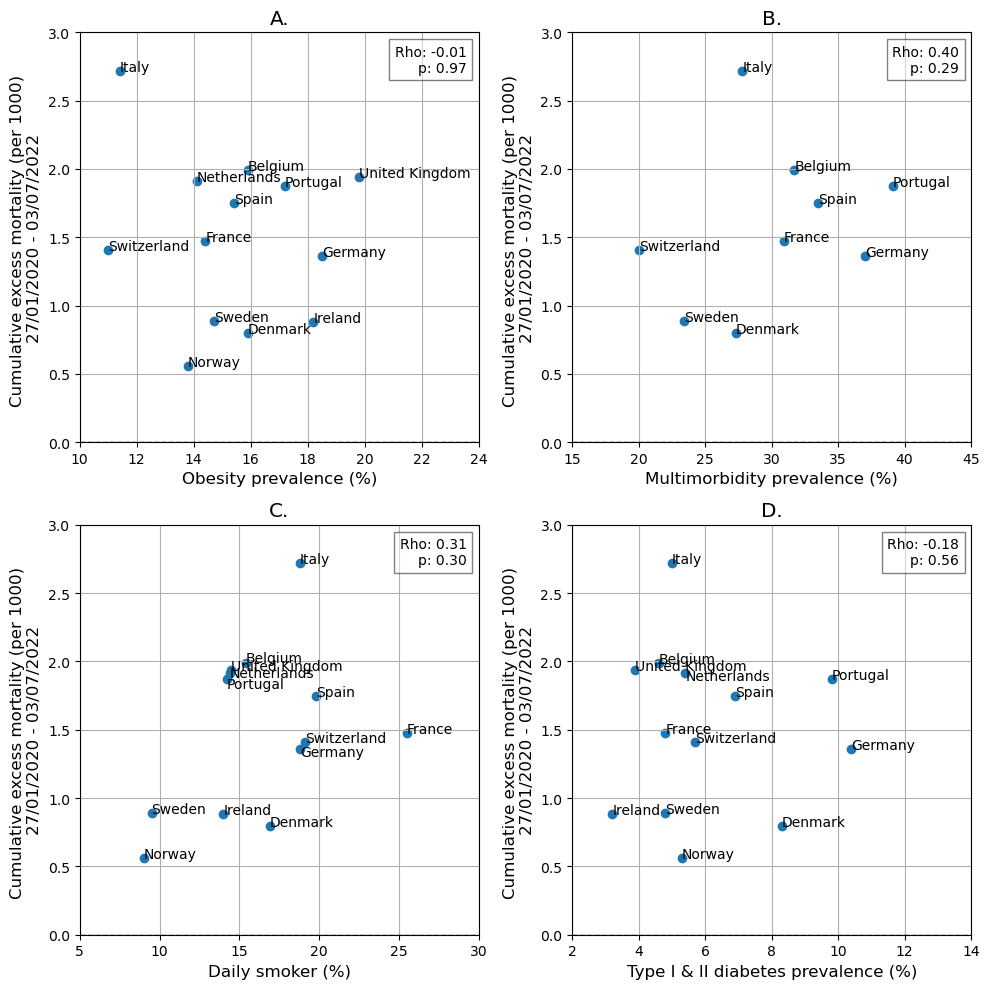

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

title="A."
xlabel='Obesity prevalence (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Obesity share', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [10,24], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[0,0])

title="B."
xlabel='Multimorbidity prevalence (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Multicomorbidity share', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [15,45], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[0,1])

title="C."
xlabel='Daily smoker (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0.01, 'Denmark':0, 'France':0, 'Germany':-0.05, 'Ireland':0, 'Italy':0, 'Netherlands':-0.025, 'Norway':0, 'Portugal':-0.07, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Smoker share', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [5,30], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1,0])

title="D."
xlabel='Type I & II diabetes prevalence (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.05, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Share of diabetics ', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [2,14], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1,1])

plt.tight_layout()
plt.show()

### IV-4) Healthcare system

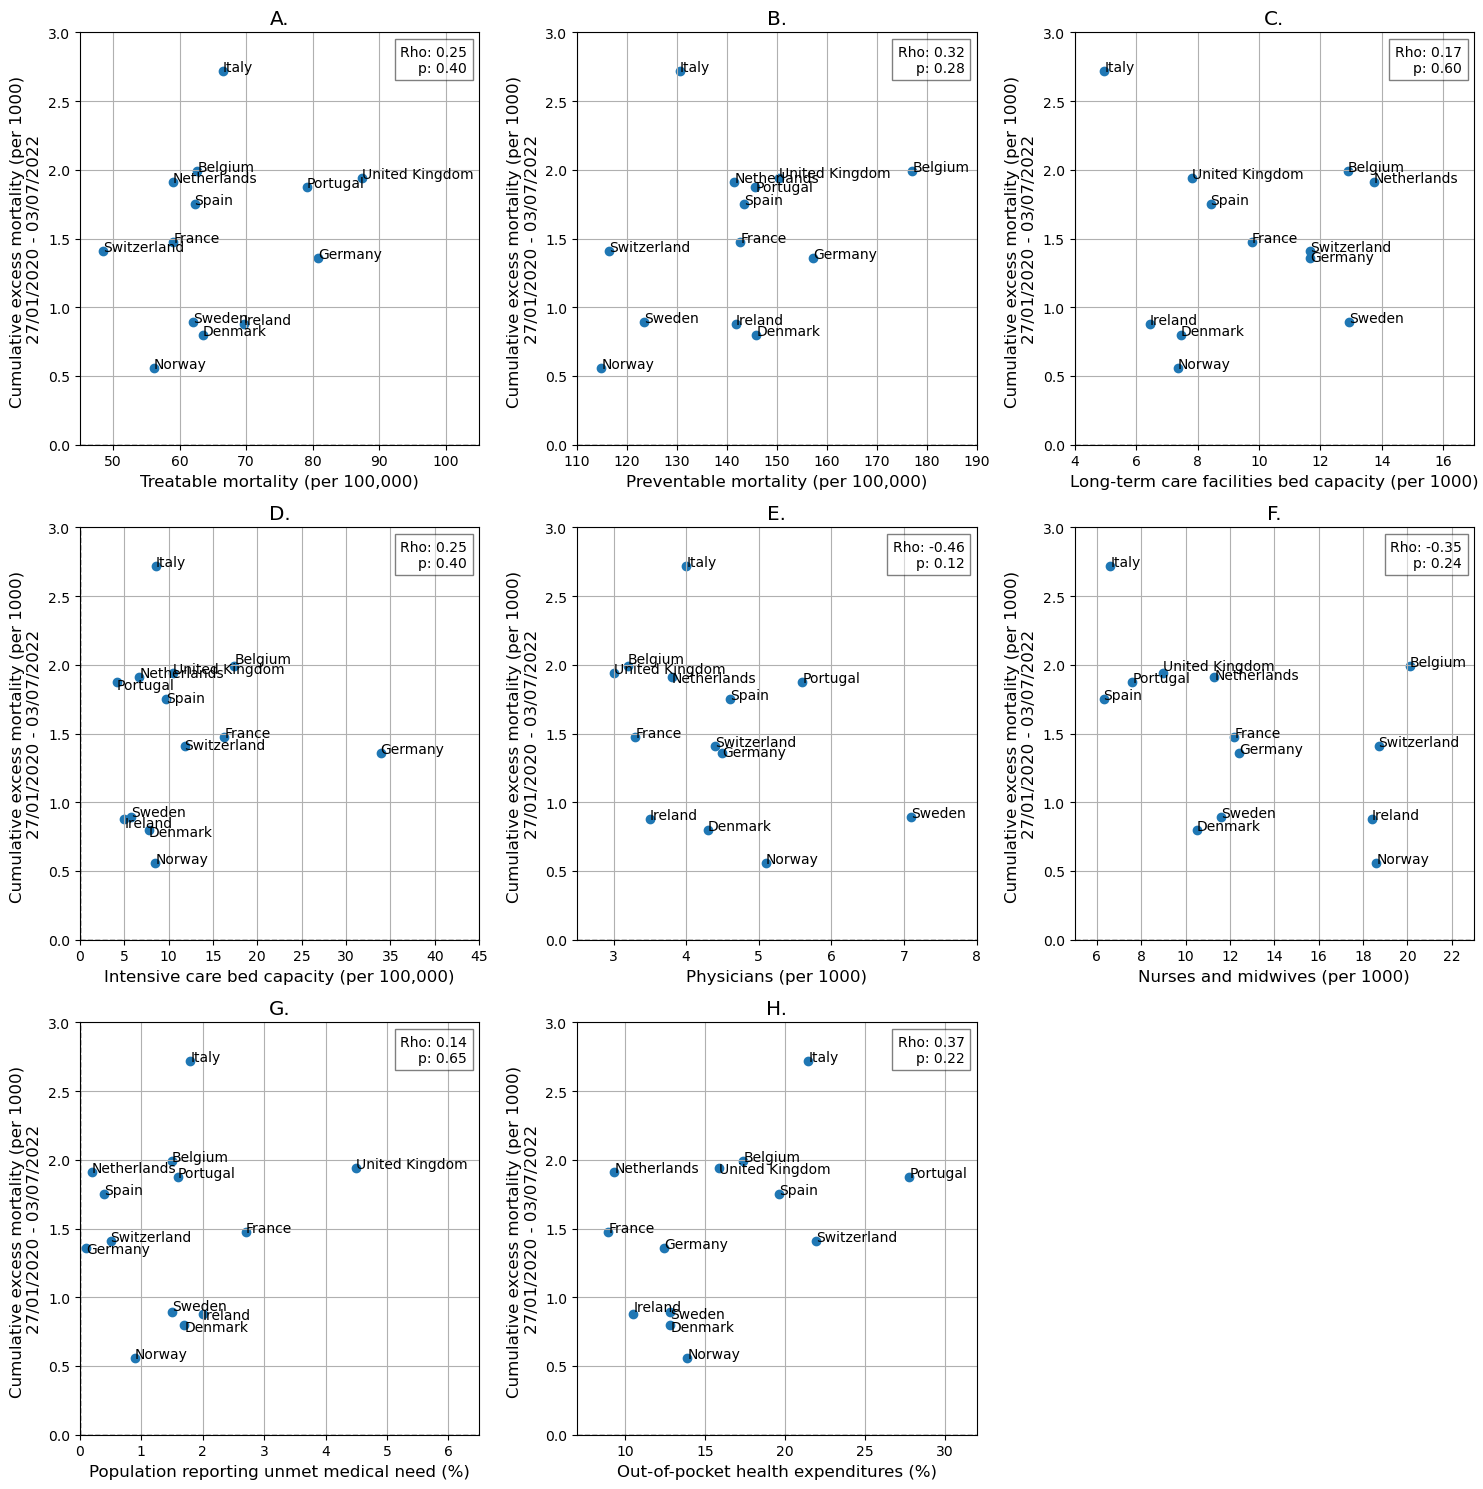

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

title="A."
xlabel='Treatable mortality (per 100,000)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Treatable mortality ', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [45,105], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[0,0])

title="B."
xlabel='Preventable mortality (per 100,000)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':-0.03, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0.01, 'England':0}
scatter_plot(data, 'Preventable mortality', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [110,190], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[0,1])

title="C."
xlabel='Long-term care facilities bed capacity (per 1000)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':-0.02, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Long-term care facilities beds', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [4,17], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[0,2])

title="D."
xlabel='Intensive care bed capacity (per 100,000)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0.02, 'Denmark':-0.04, 'France':0, 'Germany':0, 'Ireland':-0.06, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':-0.05, 'Spain':-0.02, 'Sweden':0.01, 'Switzerland':-0.02, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'ICU beds ', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [0,45], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1,0])

title="E."
xlabel='Physicians (per 1000)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0.02, 'Denmark':0, 'France':0, 'Germany':-0.02, 'Ireland':0, 'Italy':0, 'Netherlands':-0.04, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Physicians', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [2.5,8], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1,1])

title="F."
xlabel='Nurses and midwives (per 1000)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.02, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0.02, 'England':0}
scatter_plot(data, 'Nurses_midwives', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [5,23], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1,2])

title="G."
xlabel='Population reporting unmet medical need (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':-0.04, 'France':0, 'Germany':-0.04, 'Ireland':-0.04, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0.02, 'Switzerland':0, 'United Kingdom':0, 'England':0}
scatter_plot(data, 'Unmet need medical care', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [0,6.5], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[2,0])

title="H."
xlabel='Out-of-pocket health expenditures (%)'
ylabel='Cumulative excess mortality (per 1000) \n27/01/2020 - 03/07/2022'
dic_position={'Belgium':0, 'Denmark':-0.04, 'France':0, 'Germany':0, 'Ireland':0.02, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':-0.04, 'Switzerland':0, 'United Kingdom':-0.04, 'England':0}
scatter_plot(data, 'Out of pocket expenses', 'Excess_mort 27/01/2020-03/07/2022', 'Country', [7,32], [0,3], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[2,1])

fig.delaxes(axes[2,2])
plt.tight_layout()
plt.show()

# V- Stringency & Mobility

In [71]:
data_stringency_mobility = pd.read_excel(data_file, sheet_name='Mobility Stringency')

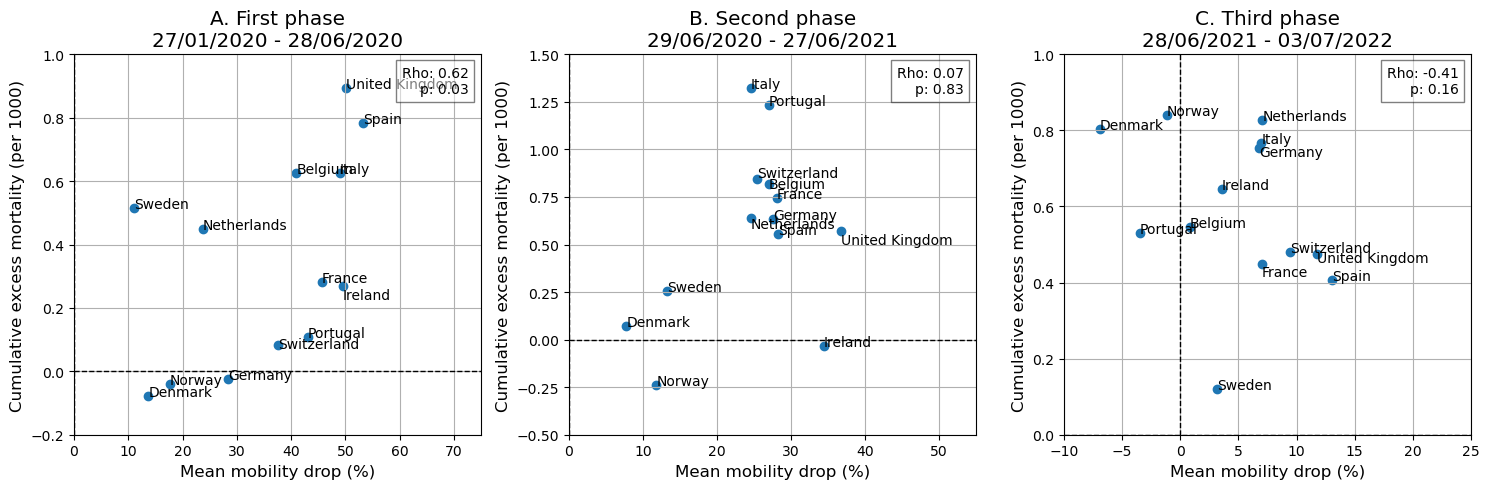

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

title="A. First phase\n27/01/2020 - 28/06/2020"
xlabel='Mean mobility drop (%)'
ylabel='Cumulative excess mortality (per 1000)'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':-0.04, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':-0.01, 'United Kingdom':0}
scatter_plot(data_stringency_mobility, 'mean_mobility__drop_periode_1', 'Excess_mort 27/01/2020-28/06/2020', 'Country', [0,75], [-0.2,1], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[0])

title="B. Second phase\n29/06/2020 - 27/06/2021"
dic_position={'Belgium':-0.02, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':-0.05, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0.01, 'United Kingdom':-0.07}
scatter_plot(data_stringency_mobility, 'mean_mobility__drop_periode_2', 'Excess_mort 29/06/2020-27/06/2021', 'Country', [0,55], [-0.5,1.5], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[1])

title="C. Third phase\n28/06/2021 - 03/07/2022"
dic_position={'Belgium':0, 'Denmark':0, 'France':-0.03, 'Germany':-0.02, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':-0.02}
scatter_plot(data_stringency_mobility, 'mean_mobility__drop_periode_3', 'Cumulative Excess From 28/06/2021 to 03/07/2022', 'Country', [-10,25], [0,1], dic_position, title, xlabel, ylabel, fac_ord=1000, box='right', ax=axes[2])

plt.tight_layout()
plt.show()

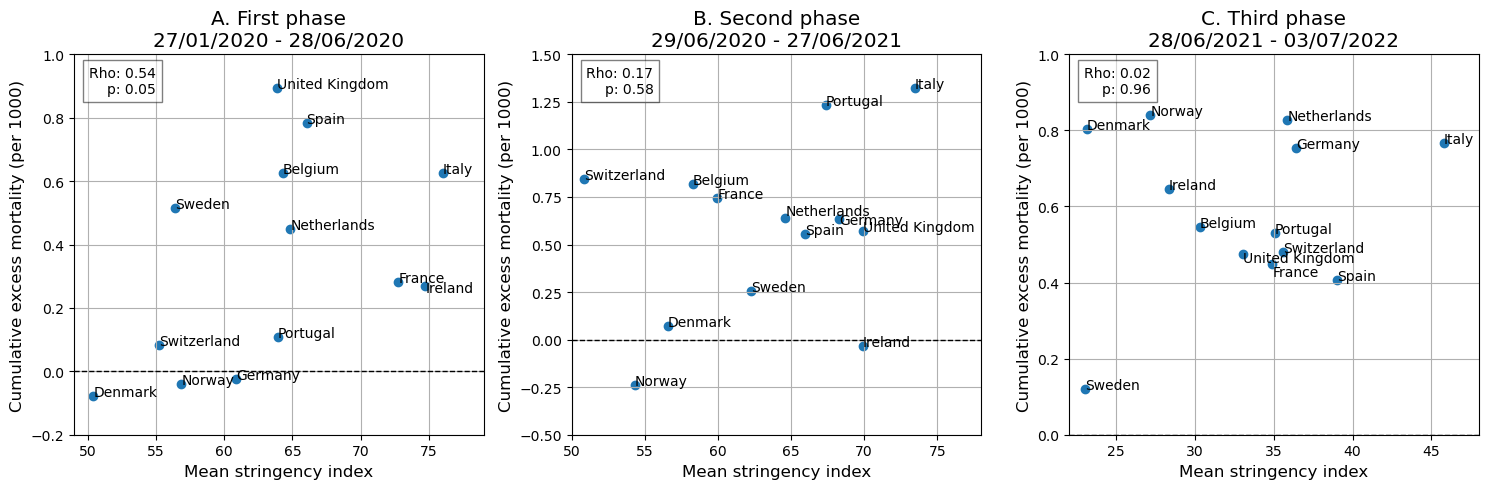

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

title="A. First phase\n27/01/2020 - 28/06/2020"
xlabel='Mean stringency index'
ylabel='Cumulative excess mortality (per 1000)'
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':-0.02, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
scatter_plot(data_stringency_mobility, 'mean_stringency_periode_1', 'Excess_mort 27/01/2020-28/06/2020', 'Country', [49,79], [-0.2,1], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[0])

title="B. Second phase\n29/06/2020 - 27/06/2021"
dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':-0.025, 'Ireland':0, 'Italy':0, 'Netherlands':0.015, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
scatter_plot(data_stringency_mobility, 'mean_stringency_periode_2', 'Excess_mort 29/06/2020-27/06/2021', 'Country', [50,78], [-0.5,1.5], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[1])

title="C. Third phase\n28/06/2021 - 03/07/2022"
dic_position={'Belgium':0, 'Denmark':0, 'France':-0.03, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':-0.02}
scatter_plot(data_stringency_mobility, 'mean_stringency_periode_3', 'Cumulative Excess From 28/06/2021 to 03/07/2022', 'Country', [22,48], [0,1], dic_position, title, xlabel, ylabel, fac_ord=1000, box='left', ax=axes[2])

plt.tight_layout()
plt.show()

### Answer for reviewers

In [74]:
data.columns

Index(['Country', 'Capital', 'Excess_mort 27/01/2020-03/07/2022',
       'Excess_mort 27/01/2020-28/06/2020',
       'Excess_mort 29/06/2020-27/06/2021',
       'Cumulative Excess From 28/06/2021 to 03/07/2022',
       'Excess_mort 28/09/2020-27/12/2020',
       'Cumulative Excess From 01/03/2021 to 27/06/2021',
       'Cumulative Excess From 01/11/2021 to 03/07/2022',
       'Excess_mort 27/01/2020-03/01/2021',
       'Excess_mort 04/01/2021-02/01/2022', 'Share of population over 65yo',
       'Share of population over 65yo_100', 'Share of population over 80yo',
       'Share of population over 80yo_100', 'Population density',
       'Share of population living in urban area',
       'International arrivals 2020', 'International arrivals 2021',
       'Obesity share', 'Smoker share', 'Multicomorbidity share',
       'Share of diabetics ', 'ICU beds ', 'Long-term care facilities beds',
       'Lower respiratory mortality', 'Preventable mortality',
       'Treatable mortality ', 'Physic

8 healthcare infrastructure indicators : 

In [81]:
hc_infra = ['ICU beds ', 'Long-term care facilities beds', 'Preventable mortality',
       'Treatable mortality ', 'Physicians', 'Nurses_midwives',
       'Unmet need medical care', 'Out of pocket expenses']

exposure_oi = ['Hospital admission first wave', 'Hospital admission second wave', 
               'Vaccine Coverage first dose 80+ area under the curve from 01/02/2021 to 31/05/2021',
               'Trust in gov 2019', 'Risk of poverty and social exclusion', 
               'Population density', 'International arrivals 2021' ]

ICU beds 
ICU beds 
ICU beds 
ICU beds 
ICU beds 
ICU beds 
ICU beds 
Long-term care facilities beds
Long-term care facilities beds
Long-term care facilities beds
Long-term care facilities beds
Long-term care facilities beds
Long-term care facilities beds
Long-term care facilities beds
Preventable mortality
Preventable mortality
Preventable mortality
Preventable mortality
Preventable mortality
Preventable mortality
Preventable mortality
Treatable mortality 
Treatable mortality 
Treatable mortality 
Treatable mortality 
Treatable mortality 
Treatable mortality 
Treatable mortality 
Physicians


/var/folders/wg/9hxl2_xs6nj34l65qfm764280000gn/T/ipykernel_5187/2479184904.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Physicians
Physicians
Physicians
Physicians
Physicians
Physicians
Nurses_midwives
Nurses_midwives
Nurses_midwives
Nurses_midwives
Nurses_midwives
Nurses_midwives
Nurses_midwives
Unmet need medical care
Unmet need medical care
Unmet need medical care
Unmet need medical care
Unmet need medical care
Unmet need medical care
Unmet need medical care
Out of pocket expenses
Out of pocket expenses
Out of pocket expenses
Out of pocket expenses
Out of pocket expenses
Out of pocket expenses
Out of pocket expenses


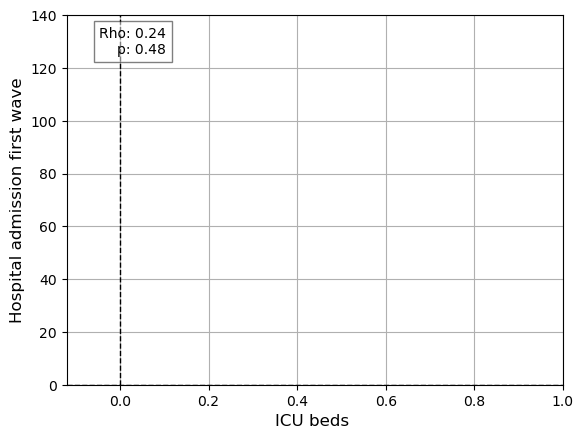

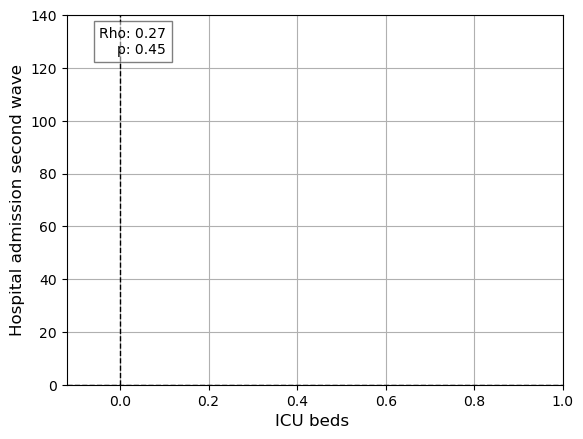

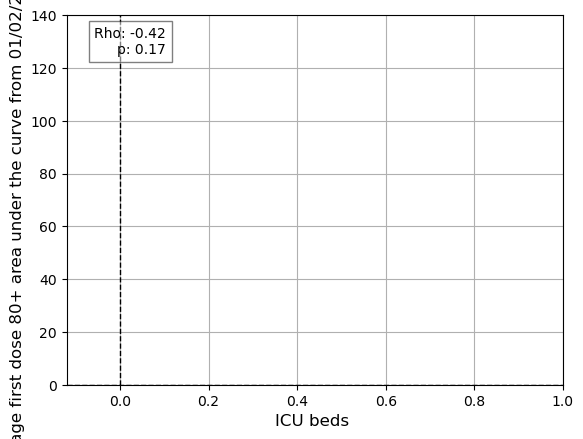

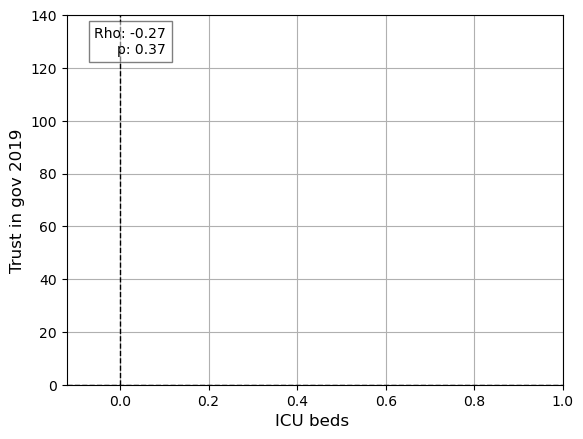

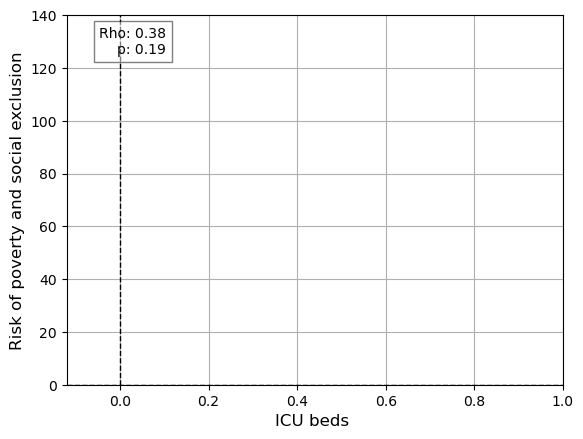

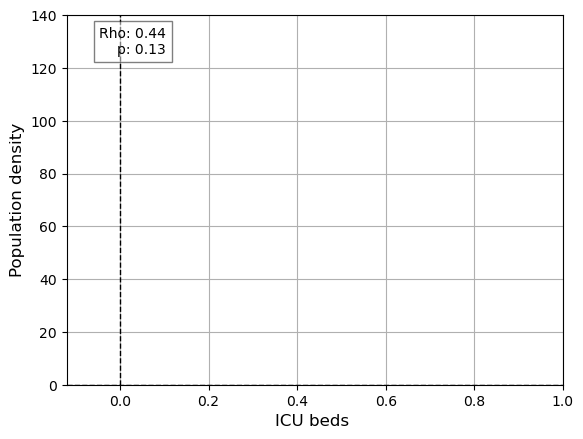

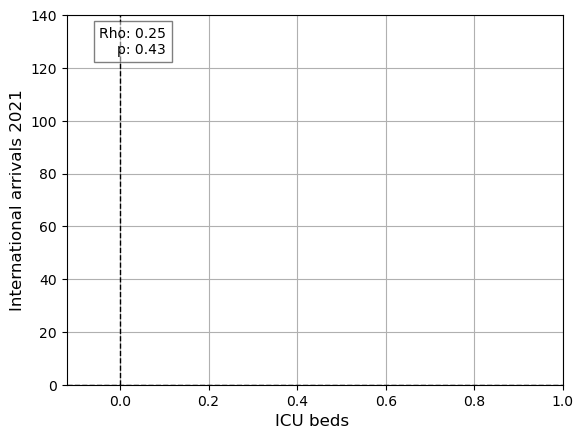

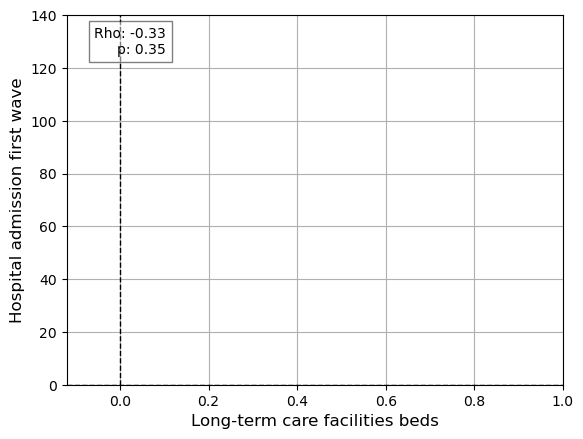

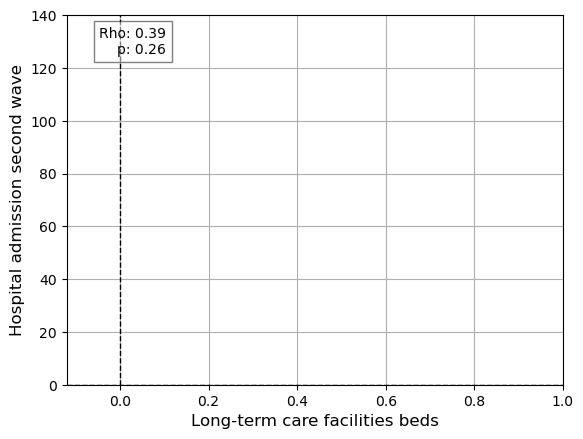

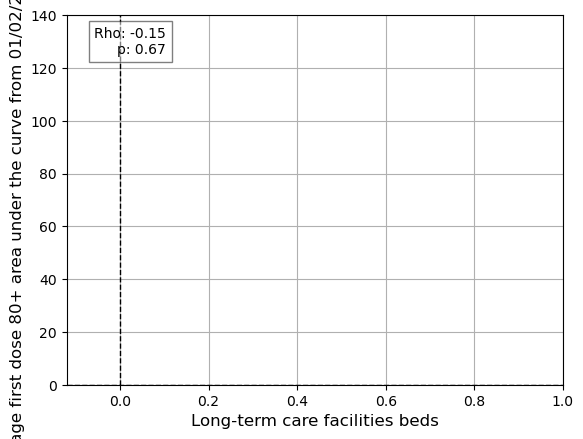

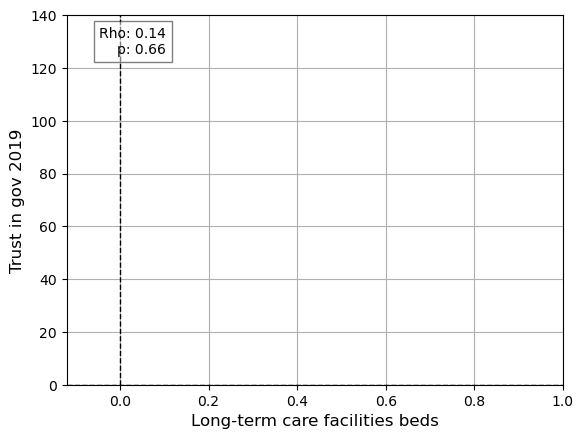

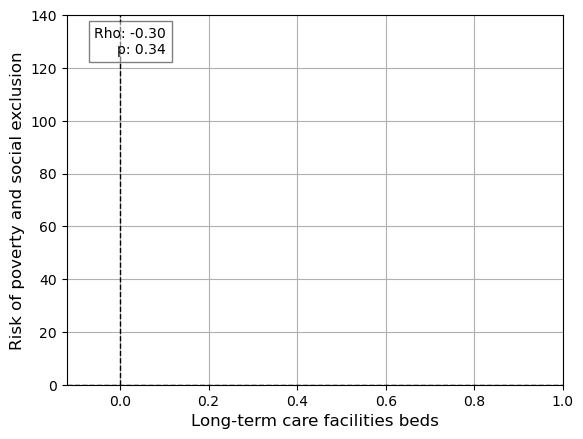

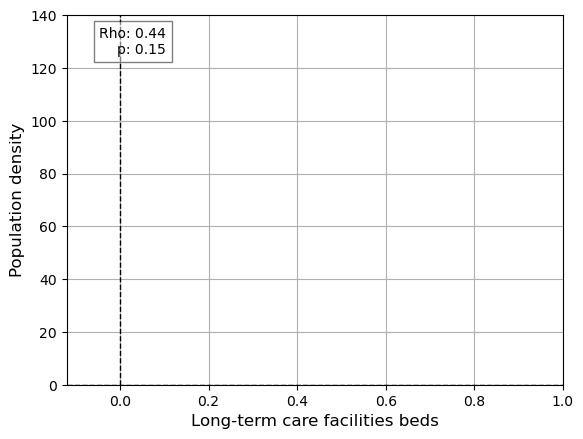

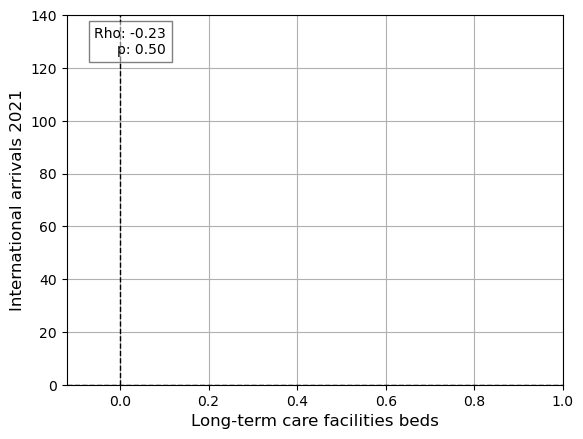

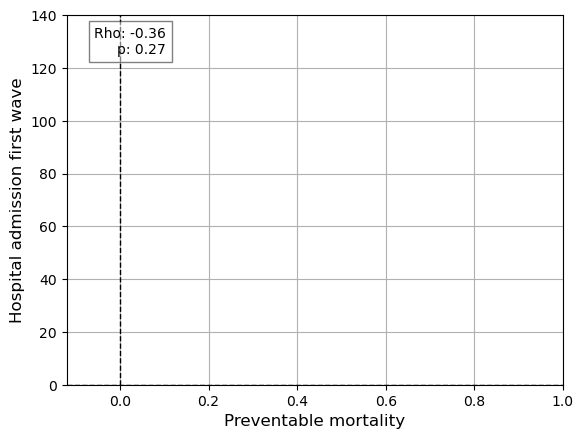

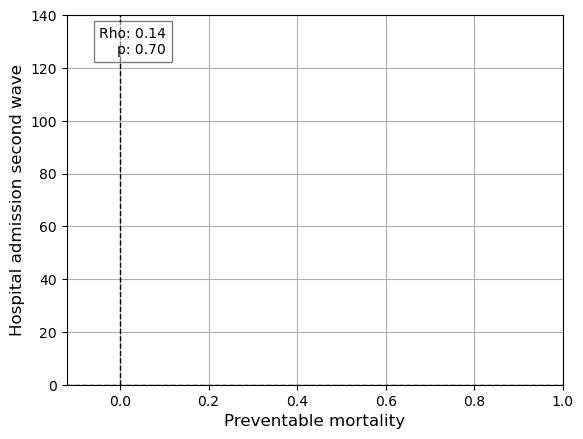

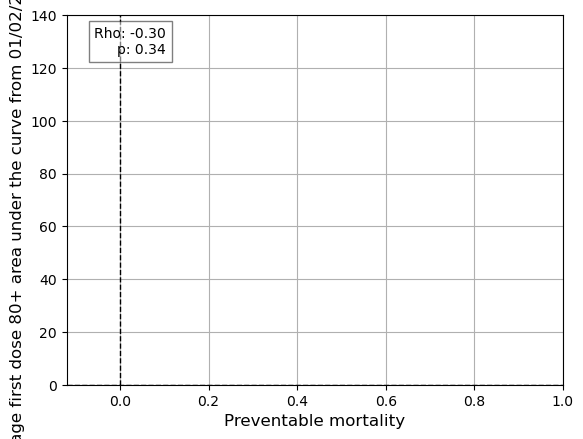

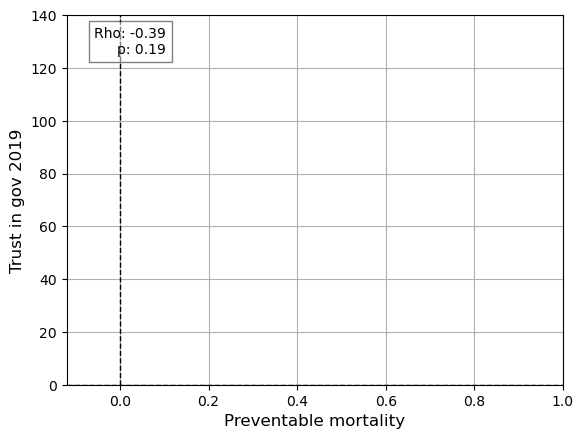

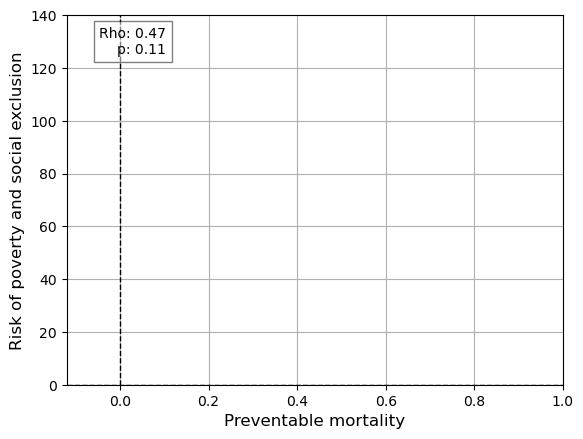

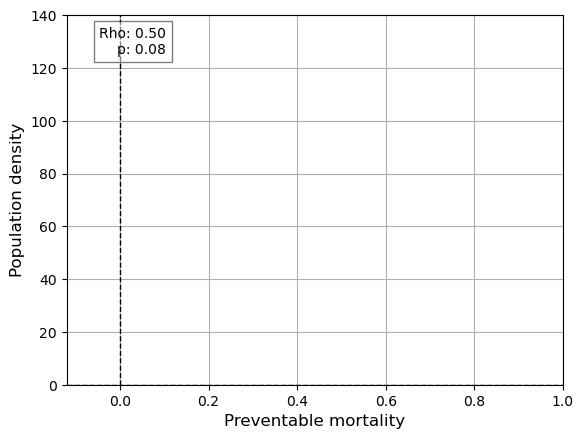

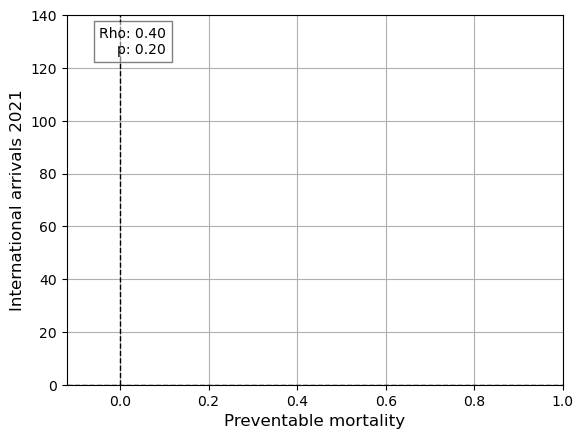

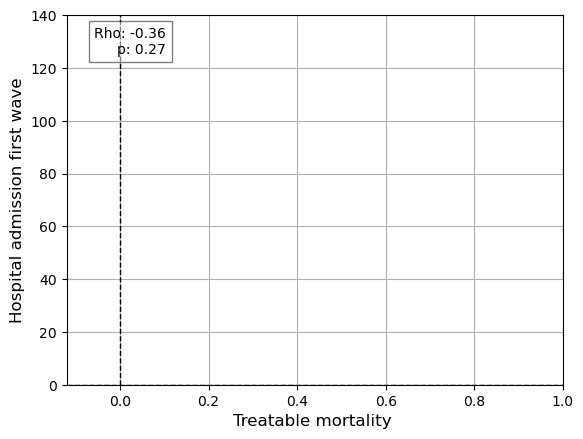

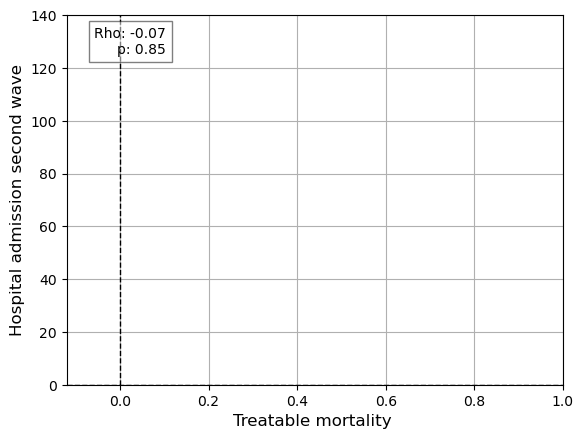

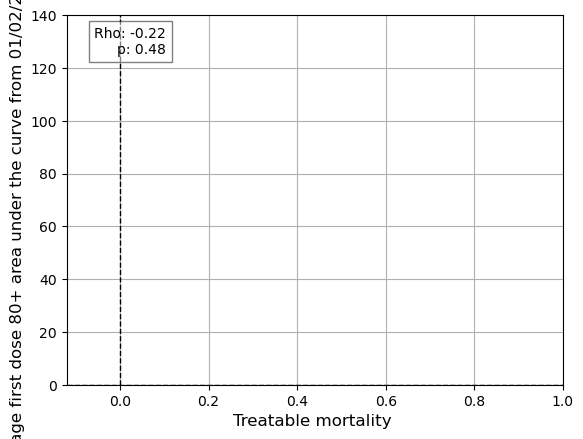

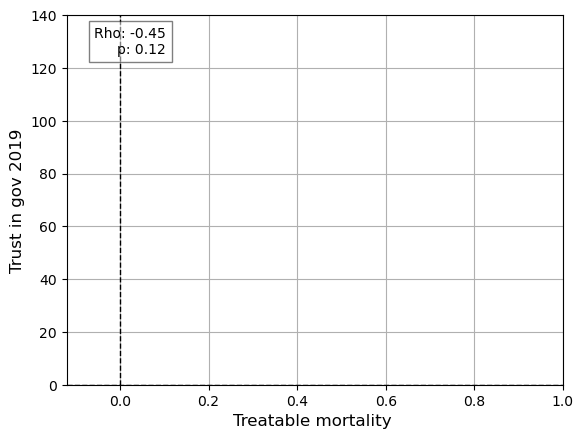

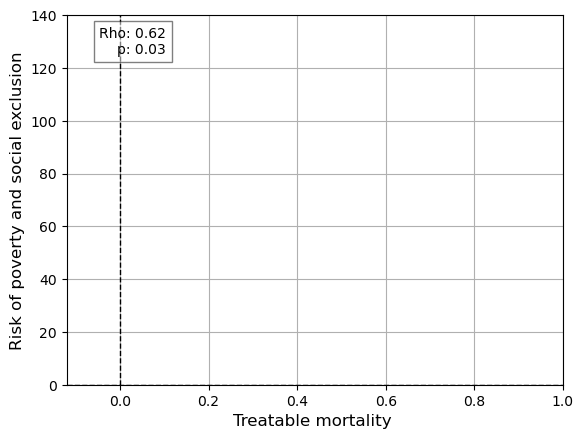

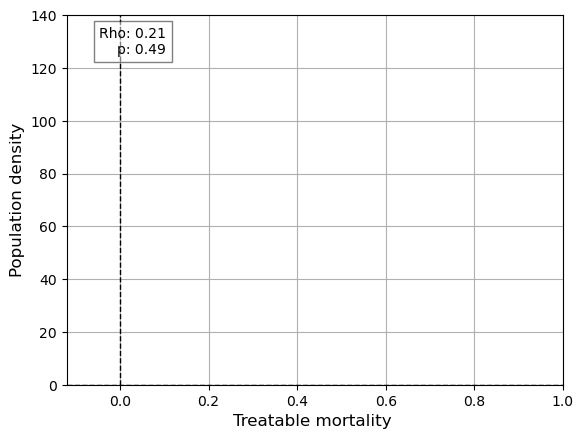

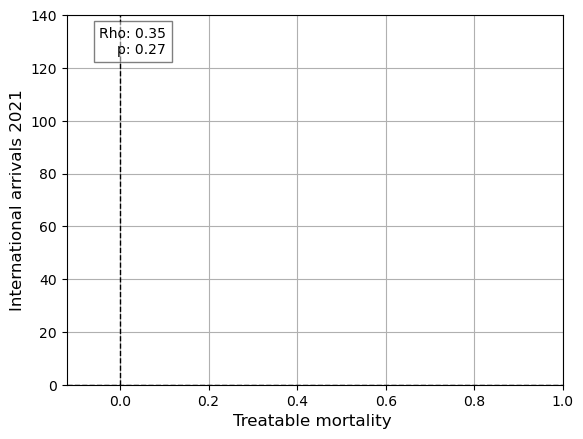

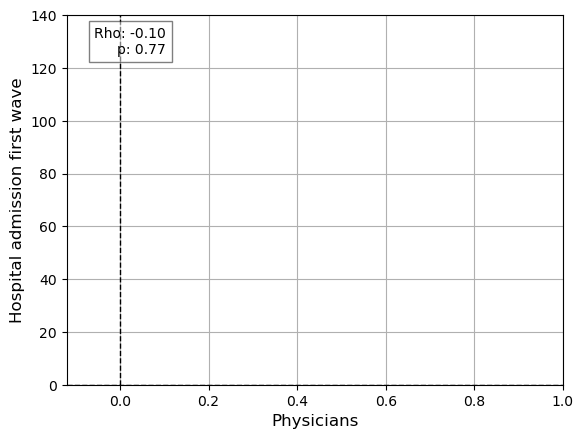

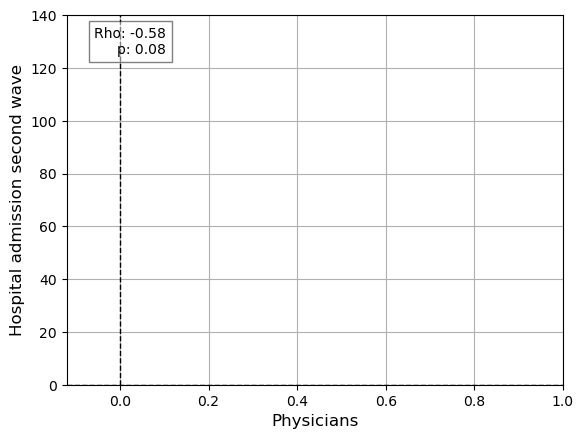

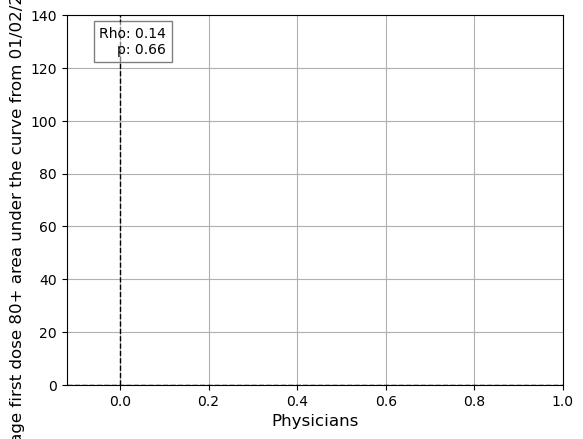

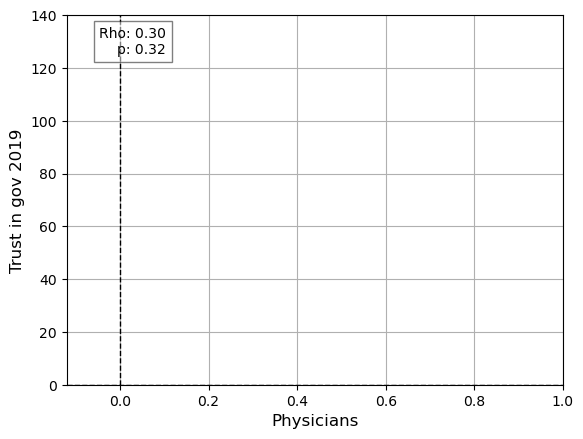

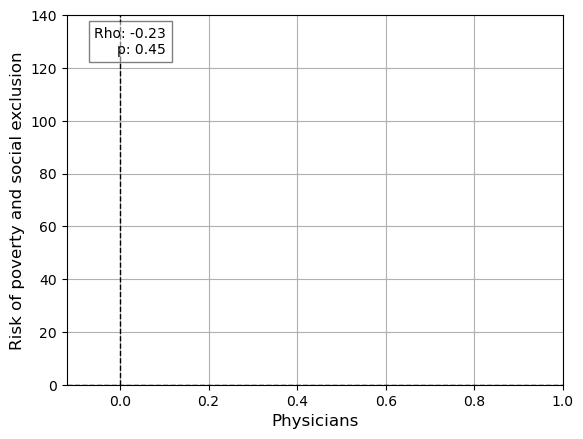

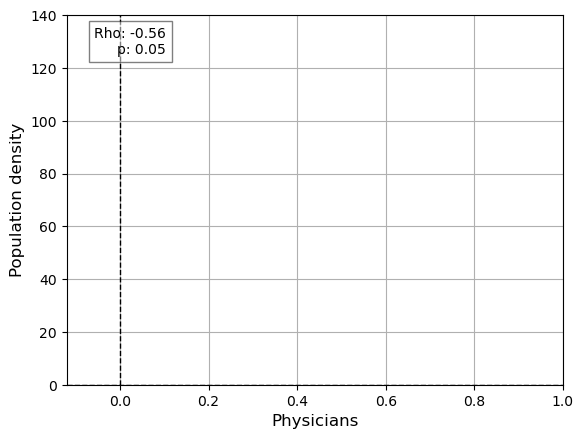

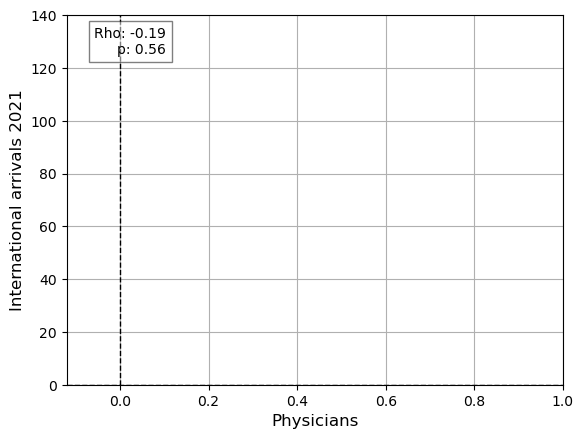

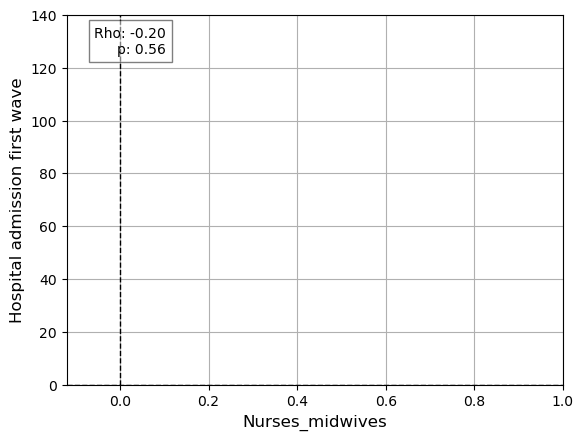

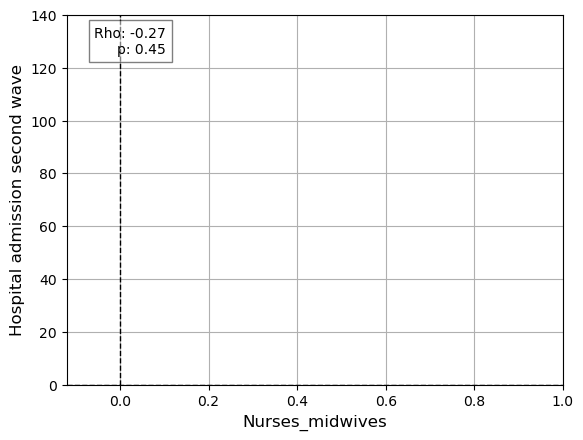

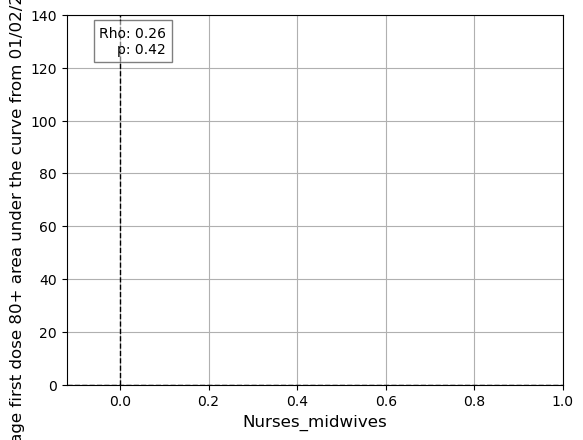

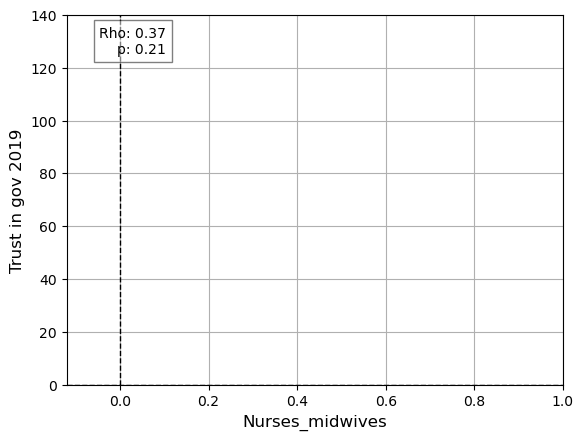

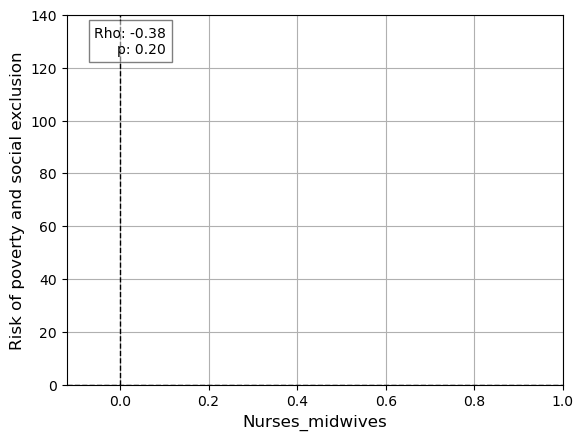

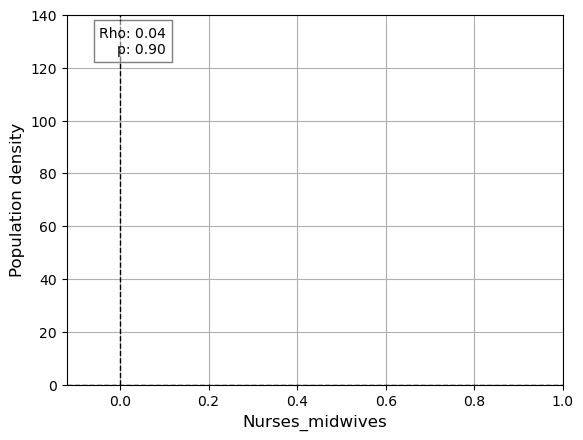

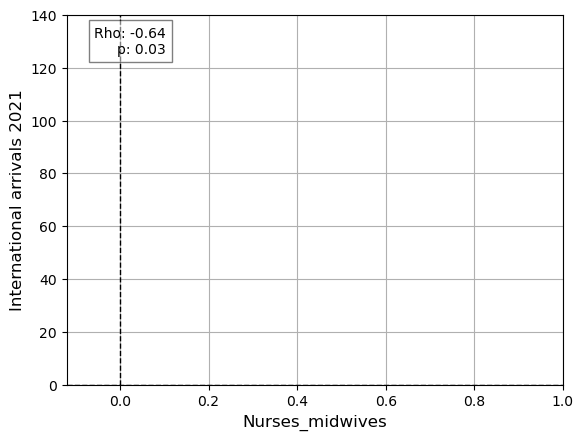

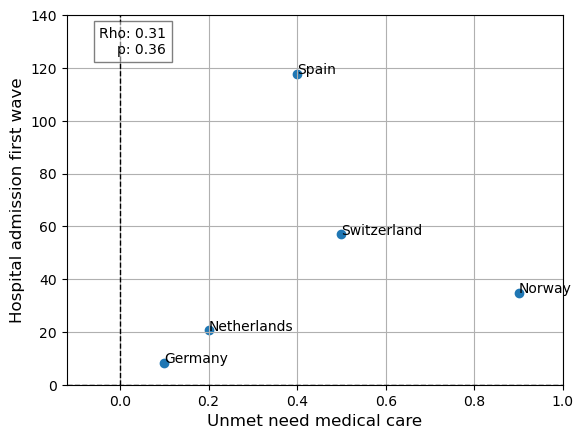

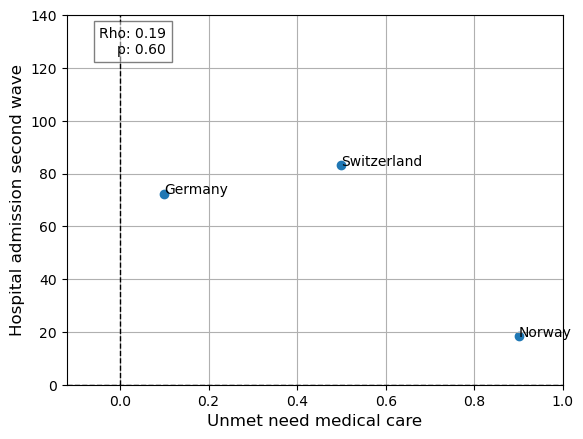

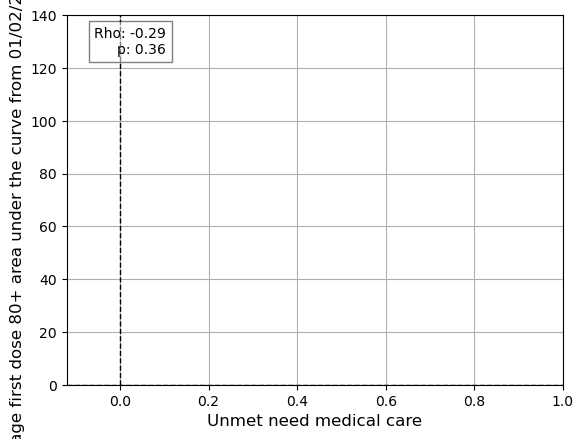

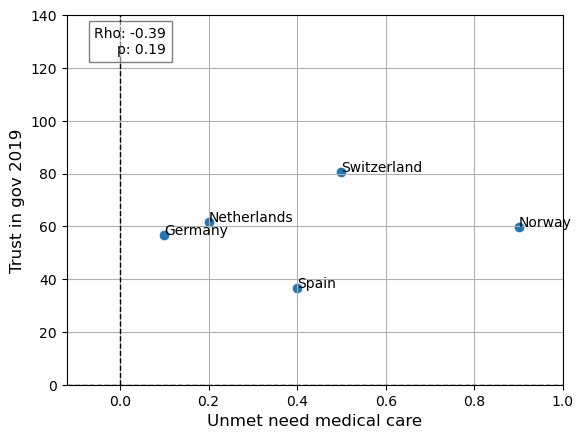

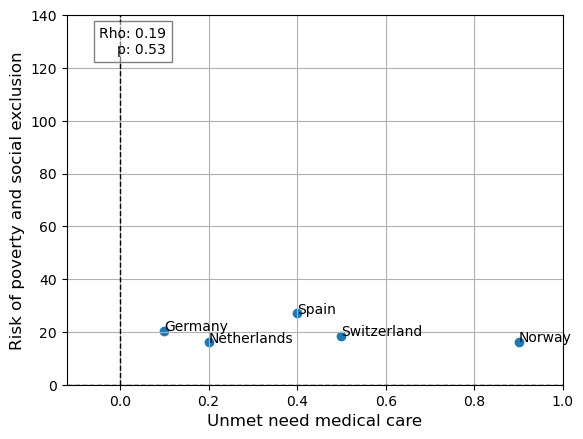

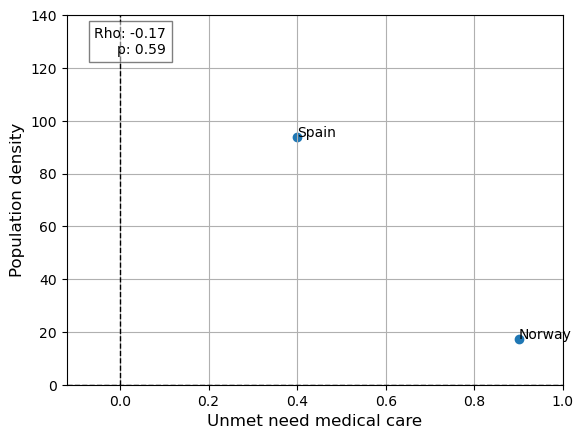

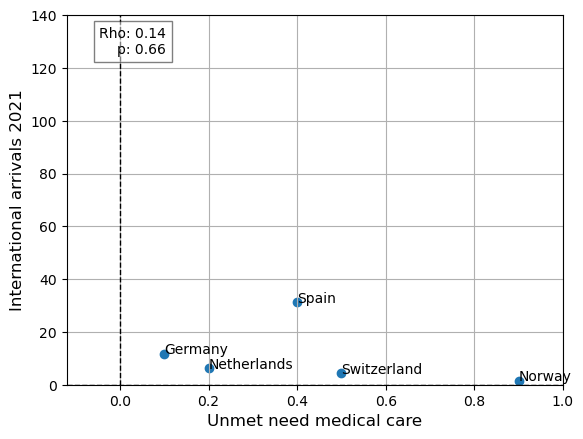

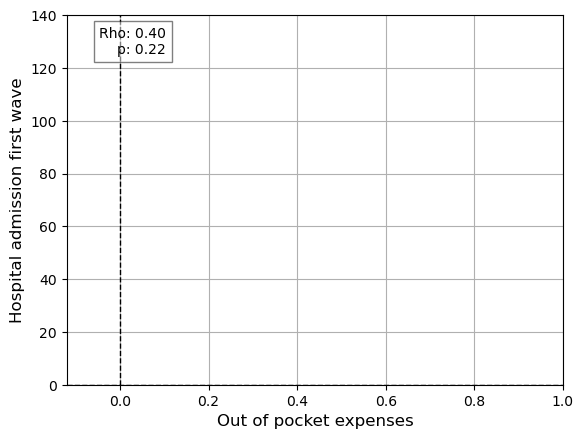

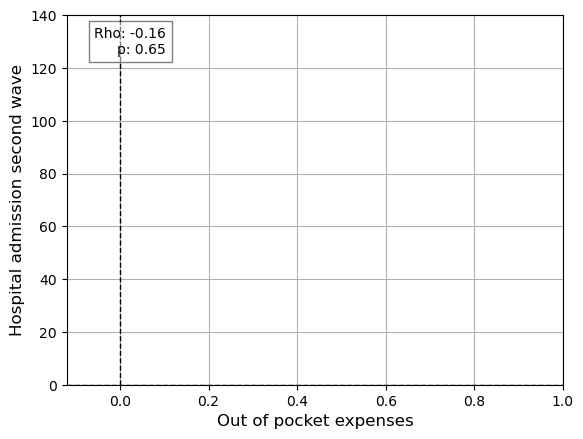

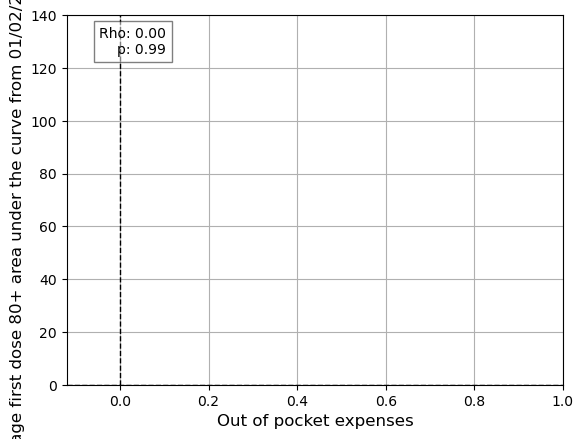

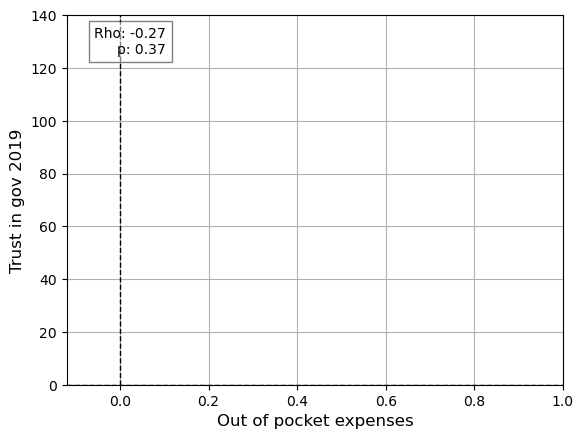

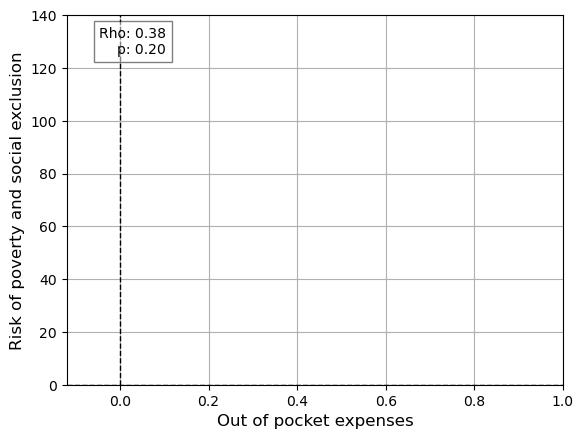

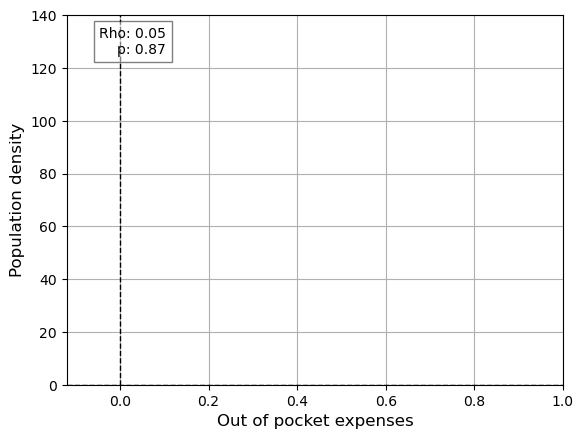

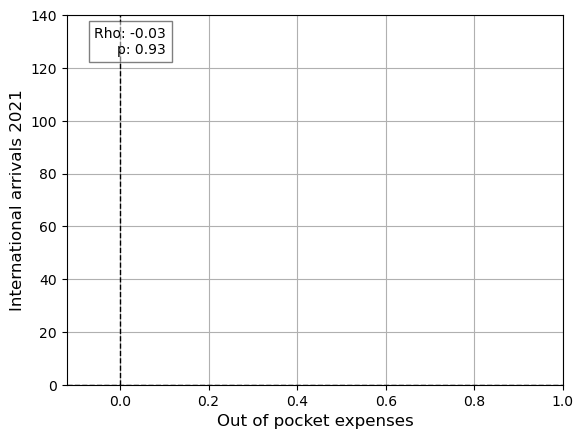

In [83]:
for var1 in hc_infra :
    for var2 in exposure_oi :
        print(var1)
    
        xlabel = var1
        ylabel = var2
        dic_position={'Belgium':0, 'Denmark':0, 'France':0, 'Germany':0, 'Ireland':0, 'Italy':0, 'Netherlands':0, 'Norway':0, 'Portugal':0, 'Spain':0, 'Sweden':0, 'Switzerland':0, 'United Kingdom':0}
        scatter_plot(data, var1, var2, 'Country',[-0.12,1],[0,140], dic_position, '', xlabel, ylabel, fac_abs=1, fac_ord=1, box='left')

